In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.8
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r3.8_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.8.csv", delimiter=" ")

menor1 = menor[:3944]
menor2 = menor[4237:]

list1 = list_of_x0[:3944]
list2 = list_of_x0[4237:]

print(list1.shape,list2.shape)

menor=np.vstack((menor1,menor2))
list_of_x0=np.hstack((list1,list2))

print(menor.shape)

(3944,) (45763,)
(7645, 4)


In [2]:


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array

    
def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    for i in range(FUTUREerror.shape[1]):
        mae.append(np.sum(a,axis=0)[i]/FUTUREerror.shape[0])
        mse.append(np.sum(b,axis=0)[i]/FUTUREerror.shape[0])
        rmse.append(np.sqrt(np.sum(b,axis=0)[i]/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse

In [3]:


future_error = []




for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 10
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])

    
    
    

0 test error: 0.002329339459368289
1 test error: 0.0020192409361034233
2 test error: 0.001724113900670739
3 test error: 0.001017547664530491
4 test error: 0.0009844006314862401
5 test error: 0.0016628584824520784
6 test error: 0.0014782847868511958
7 test error: 0.0020577393093372683
8 test error: 0.0006418533236936101
9 test error: 0.0007491880190588314
10 test error: 0.0011314799690524584
11 test error: 0.001342420507284875
12 test error: 0.0010813512667579074
13 test error: 0.0012638154344720423
14 test error: 0.0008641645770077076
15 test error: 0.0017446967079615223
16 test error: 0.0006620138809818336
17 test error: 0.0011759251702575634
18 test error: 0.0009003412250511428
19 test error: 0.0009180862929145713
20 test error: 0.0013207681507108186
21 test error: 0.0014696020039202398
22 test error: 0.0004531149520644221
23 test error: 0.0006135463855735041
24 test error: 0.0008594535652540664
25 test error: 0.0005365478954008925
26 test error: 0.0009128873642725274
27 test error: 

220 test error: 0.0010557938830267457
221 test error: 0.0010763711395235026
222 test error: 0.00095180684639369
223 test error: 0.0005627768936058904
224 test error: 0.001711526554422606
225 test error: 0.001083080857167998
226 test error: 0.000741333302815356
227 test error: 0.0007110211116762851
228 test error: 0.0006902311243778956
229 test error: 0.000812802793032512
230 test error: 0.0012694975740092673
231 test error: 0.0007707219092328995
232 test error: 0.0008092526708184458
233 test error: 0.0008192069902211491
234 test error: 0.0010221187570556844
235 test error: 0.0008641823253767783
236 test error: 0.0007820174154878257
237 test error: 0.0009580555898689999
238 test error: 0.0009472192576154048
239 test error: 0.0009216937472447044
240 test error: 0.0007806880155751536
241 test error: 0.001581261360838144
242 test error: 0.0011363535921184236
243 test error: 0.001559154803433554
244 test error: 0.0019650996012426218
245 test error: 0.000844131536371278
246 test error: 0.001

437 test error: 0.0011893999426143352
438 test error: 0.0010269017167743356
439 test error: 0.0016955249213917373
440 test error: 0.0007965009591005231
441 test error: 0.0011221193880784175
442 test error: 0.0017226176764669162
443 test error: 0.0009851143267596875
444 test error: 0.0010060527447336494
445 test error: 0.0007287896685837762
446 test error: 0.0008380251851601351
447 test error: 0.001022597879062163
448 test error: 0.0010902591708885658
449 test error: 0.0009376249422363126
450 test error: 0.0006872683709890291
451 test error: 0.001261315224521512
452 test error: 0.0006264507345804426
453 test error: 0.0007745952148664449
454 test error: 0.0009610140267603083
455 test error: 0.0006792199646989587
456 test error: 0.001672989625809657
457 test error: 0.0013875134233404995
458 test error: 0.0007758833135068442
459 test error: 0.0010357180579401016
460 test error: 0.0014872969121466253
461 test error: 0.001127826920326859
462 test error: 0.0006602085623854636
463 test error: 

655 test error: 0.0006137844115576273
656 test error: 0.0016091425013736048
657 test error: 0.0011184138610891004
658 test error: 0.0012520222335513625
659 test error: 0.0009274370427322033
660 test error: 0.001684396422972398
661 test error: 0.0005989797815210849
662 test error: 0.001274611502069355
663 test error: 0.0015278448582668484
664 test error: 0.001330053600577067
665 test error: 0.0010829205990750314
666 test error: 0.0006770698225527453
667 test error: 0.0006701015937792318
668 test error: 0.0022653455943407322
669 test error: 0.0005793307804269318
670 test error: 0.0011636353589849924
671 test error: 0.0009048686335005621
672 test error: 0.0010505694301860614
673 test error: 0.0008634016085673274
674 test error: 0.0008941262279134358
675 test error: 0.0007873387601901609
676 test error: 0.0013384225637326386
677 test error: 0.0008596265000030414
678 test error: 0.0021606466101923394
679 test error: 0.000997696138120445
680 test error: 0.0008842274791834892
681 test error: 

872 test error: 0.0006627443447070934
873 test error: 0.001133066958721222
874 test error: 0.0007981650267366694
875 test error: 0.001964562717742105
876 test error: 0.0016049280005318918
877 test error: 0.0006712725480930245
878 test error: 0.0011362839451401238
879 test error: 0.00037672430835910246
880 test error: 0.0012367781187246289
881 test error: 0.0007472279541818245
882 test error: 0.001398257163408974
883 test error: 0.0008142817694319841
884 test error: 0.0016749014093847198
885 test error: 0.0015038299003891256
886 test error: 0.0008212749539082121
887 test error: 0.0006485162781910515
888 test error: 0.0008482420181448383
889 test error: 0.000869560848969879
890 test error: 0.0018530314735858676
891 test error: 0.0008444230428805899
892 test error: 0.0017136733166247563
893 test error: 0.0011228420238432995
894 test error: 0.000788103626409188
895 test error: 0.0009223850009124879
896 test error: 0.0009126361273365922
897 test error: 0.0015448408117744292
898 test error: 

1090 test error: 0.0008220252697869477
1091 test error: 0.0008262237634223269
1092 test error: 0.0008486119517550199
1093 test error: 0.0008725376804645186
1094 test error: 0.0017829651132917287
1095 test error: 0.0006626002525767683
1096 test error: 0.0010547618487319471
1097 test error: 0.0012002610663280008
1098 test error: 0.0010647004739745556
1099 test error: 0.0008888920712233129
1100 test error: 0.0007737413725054475
1101 test error: 0.0009293851934583313
1102 test error: 0.0017069463592722038
1103 test error: 0.0009709296851692515
1104 test error: 0.0008993967291076235
1105 test error: 0.001163502312755395
1106 test error: 0.0010450933534389695
1107 test error: 0.001288950348881455
1108 test error: 0.0006975938769836701
1109 test error: 0.0013170046011592052
1110 test error: 0.0008788404889959672
1111 test error: 0.0005016433474503479
1112 test error: 0.0008030093240114352
1113 test error: 0.0010701834577344698
1114 test error: 0.0008956146465271613
1115 test error: 0.00047114

1301 test error: 0.0008384533663018492
1302 test error: 0.001250332940963149
1303 test error: 0.0012595909149894192
1304 test error: 0.0008906251100901398
1305 test error: 0.0006343428148830343
1306 test error: 0.0012369657603214855
1307 test error: 0.0010198193780854257
1308 test error: 0.0010851584345087017
1309 test error: 0.0007982447492132078
1310 test error: 0.0014890889830103066
1311 test error: 0.0007963651245895566
1312 test error: 0.0014568705470128132
1313 test error: 0.0008801004290311795
1314 test error: 0.0006620311333208658
1315 test error: 0.0013115278039735135
1316 test error: 0.0012400274693756496
1317 test error: 0.0013229652233048665
1318 test error: 0.0012597514988300247
1319 test error: 0.001725212023616275
1320 test error: 0.0013439056340823904
1321 test error: 0.0008562501534384214
1322 test error: 0.0014465114387823448
1323 test error: 0.0013856262260418736
1324 test error: 0.0006742641051363602
1325 test error: 0.0013293014214583482
1326 test error: 0.00147885

1516 test error: 0.001240563621566072
1517 test error: 0.0012843827507551557
1518 test error: 0.0015411716148692237
1519 test error: 0.0010163444152248955
1520 test error: 0.0012788255871680673
1521 test error: 0.0011376012948184698
1522 test error: 0.0006296179790509494
1523 test error: 0.0011114642878515466
1524 test error: 0.0014247762254569534
1525 test error: 0.0007515559881969812
1526 test error: 0.0007310363459569064
1527 test error: 0.0016203972711508522
1528 test error: 0.0011831469209885985
1529 test error: 0.0011250701609173794
1530 test error: 0.0012647437417006538
1531 test error: 0.001332303229724628
1532 test error: 0.0010864432011246962
1533 test error: 0.001407874953133654
1534 test error: 0.0017314338499767143
1535 test error: 0.001339569529835174
1536 test error: 0.0008425674167376343
1537 test error: 0.0007355858687951086
1538 test error: 0.0013931184103895084
1539 test error: 0.0005364366508850553
1540 test error: 0.0014993321460888506
1541 test error: 0.0015855213

1727 test error: 0.0013052842570106557
1728 test error: 0.001218386520137616
1729 test error: 0.0010405862883119048
1730 test error: 0.00114707803968789
1731 test error: 0.0017713035999673095
1732 test error: 0.0006586073946687194
1733 test error: 0.0012148441069619164
1734 test error: 0.0011134302187744624
1735 test error: 0.001258514771100576
1736 test error: 0.0011321405622464107
1737 test error: 0.0011492140621359997
1738 test error: 0.0009644705211836238
1739 test error: 0.0010696499779281868
1740 test error: 0.0008285412895570093
1741 test error: 0.0009668835771263433
1742 test error: 0.001107750822665569
1743 test error: 0.002064191864733832
1744 test error: 0.0012240668162314821
1745 test error: 0.0013272822289090934
1746 test error: 0.0010418907771071403
1747 test error: 0.0015188432249052934
1748 test error: 0.0012414968433907539
1749 test error: 0.0011045073085262337
1750 test error: 0.0010058694051812054
1751 test error: 0.001499121604453164
1752 test error: 0.0006857756764

1941 test error: 0.0008673447798678525
1942 test error: 0.0013964679293158818
1943 test error: 0.0021000876794219766
1944 test error: 0.0010133162008585713
1945 test error: 0.0016132232174057347
1946 test error: 0.0009506240027772868
1947 test error: 0.0012867712622674351
1948 test error: 0.0005603067580440584
1949 test error: 0.0015445219573977504
1950 test error: 0.0016202937525944545
1951 test error: 0.0006089818467033268
1952 test error: 0.0006639011892679945
1953 test error: 0.0011505934507834048
1954 test error: 0.0013233169999467514
1955 test error: 0.0012068299041078981
1956 test error: 0.0009309663679741272
1957 test error: 0.0011111437781415267
1958 test error: 0.00040415577169068033
1959 test error: 0.0008047277358217639
1960 test error: 0.0010003549483318895
1961 test error: 0.0011722371907327545
1962 test error: 0.0009743951136610363
1963 test error: 0.0008374751839589739
1964 test error: 0.0005547831588756755
1965 test error: 0.0014439330872645147
1966 test error: 0.00103

2156 test error: 0.0007895715834659636
2157 test error: 0.0016252911026286608
2158 test error: 0.0006840312825541322
2159 test error: 0.002373983816968971
2160 test error: 0.0006337456534264534
2161 test error: 0.0018814760071807766
2162 test error: 0.0019373848635073118
2163 test error: 0.0009065328752556873
2164 test error: 0.0008273689633539973
2165 test error: 0.0012210013035068665
2166 test error: 0.0014306328833812258
2167 test error: 0.0014268768960601687
2168 test error: 0.0015063677350745615
2169 test error: 0.0010036419796327666
2170 test error: 0.0010307378854900364
2171 test error: 0.0016968925308689265
2172 test error: 0.0020277367989626487
2173 test error: 0.0014177175990792953
2174 test error: 0.0014341146314637647
2175 test error: 0.0013170301512691908
2176 test error: 0.0012193983556779261
2177 test error: 0.0011485748998100013
2178 test error: 0.0016406925551810108
2179 test error: 0.0009011101739443314
2180 test error: 0.0014113267799207704
2181 test error: 0.0007600

2369 test error: 0.0006345601181618202
2370 test error: 0.0012669968880492895
2371 test error: 0.0011880773045639243
2372 test error: 0.0018246788400163793
2373 test error: 0.0009442446698465011
2374 test error: 0.0014057678104880214
2375 test error: 0.0012564672116934866
2376 test error: 0.00101837669576055
2377 test error: 0.000567859356082472
2378 test error: 0.0010794205430080437
2379 test error: 0.0007853376842236399
2380 test error: 0.0011665267883246206
2381 test error: 0.0007135788306543022
2382 test error: 0.0013917305448568331
2383 test error: 0.0014909793235796422
2384 test error: 0.000781300966254971
2385 test error: 0.0005254788036678429
2386 test error: 0.001926011221450709
2387 test error: 0.0016955675652673737
2388 test error: 0.0013303684345527679
2389 test error: 0.0007787040427779986
2390 test error: 0.000767894350904637
2391 test error: 0.0008054646741421851
2392 test error: 0.0012542994592465767
2393 test error: 0.000896047615123929
2394 test error: 0.0017405404770

2581 test error: 0.00060515738353481
2582 test error: 0.0010785550258304581
2583 test error: 0.0009361665890749521
2584 test error: 0.0010904480556439605
2585 test error: 0.000922548710355043
2586 test error: 0.0007815273313028194
2587 test error: 0.0006899801304433965
2588 test error: 0.0014266012405282518
2589 test error: 0.001070464601085565
2590 test error: 0.0014001705472005443
2591 test error: 0.0005616003591849354
2592 test error: 0.0011766202709847969
2593 test error: 0.0006028009096485852
2594 test error: 0.0017988929601343063
2595 test error: 0.0010045967342781387
2596 test error: 0.001055075707288471
2597 test error: 0.0008069375246582563
2598 test error: 0.000977527746914316
2599 test error: 0.0007062972168283685
2600 test error: 0.0009171318552469546
2601 test error: 0.0005579060973449025
2602 test error: 0.0013871074088595687
2603 test error: 0.0007445070219247184
2604 test error: 0.0011347709904526808
2605 test error: 0.0011032729860187057
2606 test error: 0.000680934850

2793 test error: 0.0010912733073621369
2794 test error: 0.0012270727303322962
2795 test error: 0.0010145532306797581
2796 test error: 0.0008647037916981946
2797 test error: 0.001838730434496048
2798 test error: 0.0015091176975661116
2799 test error: 0.0015731781177586999
2800 test error: 0.0010998331722913528
2801 test error: 0.0009428067255325488
2802 test error: 0.0008169881382326008
2803 test error: 0.001175601275485265
2804 test error: 0.0014697722394603244
2805 test error: 0.0009722580373716228
2806 test error: 0.001545691157699259
2807 test error: 0.0009361432147402265
2808 test error: 0.0007900969654466153
2809 test error: 0.0012105755905043021
2810 test error: 0.0013657230180623148
2811 test error: 0.0012778850618690876
2812 test error: 0.0010232417542091975
2813 test error: 0.0018253770846915715
2814 test error: 0.0007319006404410277
2815 test error: 0.0014552417424683387
2816 test error: 0.0005752234948686685
2817 test error: 0.0011410290732828871
2818 test error: 0.001228076

3005 test error: 0.0020017816036667553
3006 test error: 0.0013546647263664154
3007 test error: 0.00043814049732431384
3008 test error: 0.0009486077041216879
3009 test error: 0.0017079620311217286
3010 test error: 0.0008193797957523369
3011 test error: 0.0009561523984688267
3012 test error: 0.001014462965197809
3013 test error: 0.0015466298953200213
3014 test error: 0.0009825668481916558
3015 test error: 0.0012688069513134813
3016 test error: 0.002016376390569926
3017 test error: 0.0007558679304301893
3018 test error: 0.0011285761757400027
3019 test error: 0.0012294756887246102
3020 test error: 0.001315914106042632
3021 test error: 0.0005601123504687409
3022 test error: 0.0012546302157590093
3023 test error: 0.0012309441879056289
3024 test error: 0.001388240114431471
3025 test error: 0.0020479737474290442
3026 test error: 0.0004482809864524386
3027 test error: 0.0007433054272572
3028 test error: 0.0005957326888516012
3029 test error: 0.000952913414520807
3030 test error: 0.0016081208791

3216 test error: 0.0009518495137467829
3217 test error: 0.0008981781216020759
3218 test error: 0.0014532158272878386
3219 test error: 0.0008522250048121267
3220 test error: 0.0010850927733163742
3221 test error: 0.0011020785672788643
3222 test error: 0.0010131254009384627
3223 test error: 0.0009576378141810892
3224 test error: 0.0006250290984870899
3225 test error: 0.0016695031923170233
3226 test error: 0.0011531722025806775
3227 test error: 0.0013582243154460342
3228 test error: 0.0015003679431663931
3229 test error: 0.0011042161008974892
3230 test error: 0.0012427067265496179
3231 test error: 0.0006393068545887092
3232 test error: 0.0008559678048625138
3233 test error: 0.001918380197044522
3234 test error: 0.0009651985246270557
3235 test error: 0.0017465099962751106
3236 test error: 0.0005287226840055306
3237 test error: 0.001780712787111729
3238 test error: 0.001138388200972862
3239 test error: 0.0009032406369248947
3240 test error: 0.0008589090994655188
3241 test error: 0.000709566

3428 test error: 0.0006508107584739114
3429 test error: 0.0010677258202430521
3430 test error: 0.001627905783544222
3431 test error: 0.0011987706686227104
3432 test error: 0.0014907889913584392
3433 test error: 0.0010335743145084765
3434 test error: 0.0015236989975201257
3435 test error: 0.0007850202493157658
3436 test error: 0.0005417608021483631
3437 test error: 0.0014733800943988842
3438 test error: 0.0015037327949772234
3439 test error: 0.001086204136849788
3440 test error: 0.0006154523079222385
3441 test error: 0.0012408270047833325
3442 test error: 0.0012140027333523735
3443 test error: 0.0013368442073294217
3444 test error: 0.0012145249333990553
3445 test error: 0.0011738799447309808
3446 test error: 0.0008246382464857556
3447 test error: 0.0006491098053471414
3448 test error: 0.0006435907276698905
3449 test error: 0.000813637695012132
3450 test error: 0.001377463518458071
3451 test error: 0.000490853174837962
3452 test error: 0.000499725735589663
3453 test error: 0.000757178300

3640 test error: 0.000930923499299511
3641 test error: 0.0009893309647621335
3642 test error: 0.001270617993410357
3643 test error: 0.0008893062194003235
3644 test error: 0.0006062237050251575
3645 test error: 0.0013595006993950545
3646 test error: 0.0017911362146728275
3647 test error: 0.0007290738662114506
3648 test error: 0.0006978379013819254
3649 test error: 0.0011013526859389537
3650 test error: 0.0011955688669240518
3651 test error: 0.0010072790310129969
3652 test error: 0.000986843668014757
3653 test error: 0.0012040220137061605
3654 test error: 0.0005766328917596665
3655 test error: 0.00047684541524855293
3656 test error: 0.0015878687943914882
3657 test error: 0.0007007648236872613
3658 test error: 0.0013935862423228326
3659 test error: 0.0009023963797967507
3660 test error: 0.0014928420741785815
3661 test error: 0.001164339080714663
3662 test error: 0.0009834752457115923
3663 test error: 0.0008643806306557403
3664 test error: 0.0008746340114686906
3665 test error: 0.000830704

3851 test error: 0.0008444748649662939
3852 test error: 0.0017483743718024589
3853 test error: 0.000576772052717817
3854 test error: 0.001359122764678281
3855 test error: 0.0013555865914794388
3856 test error: 0.001004258330924499
3857 test error: 0.0007008919797051603
3858 test error: 0.0007092815195953833
3859 test error: 0.0014944019139121099
3860 test error: 0.001270901282311521
3861 test error: 0.0013479484754080012
3862 test error: 0.001163355777915438
3863 test error: 0.0009599198449456538
3864 test error: 0.0014639066644417029
3865 test error: 0.0016730494986192733
3866 test error: 0.0004951630353785968
3867 test error: 0.0012361854668400656
3868 test error: 0.0009592096005699419
3869 test error: 0.000920593527766598
3870 test error: 0.0019663131588732795
3871 test error: 0.0013090009458576227
3872 test error: 0.0011001199543042785
3873 test error: 0.001058769388520754
3874 test error: 0.0013967650372839649
3875 test error: 0.001123190895142823
3876 test error: 0.00096587488738

4063 test error: 0.0008970294104988384
4064 test error: 0.000980067081028651
4065 test error: 0.0013750735291146643
4066 test error: 0.0010840361527860414
4067 test error: 0.000557408398622947
4068 test error: 0.0005502700823614853
4069 test error: 0.0012516240940479784
4070 test error: 0.0015469575571434673
4071 test error: 0.0009243249122879334
4072 test error: 0.0009056435012891607
4073 test error: 0.0013649338865377011
4074 test error: 0.0010628518696247007
4075 test error: 0.0007776888517445497
4076 test error: 0.00045680139416702157
4077 test error: 0.0006035089559281138
4078 test error: 0.0016040565570096964
4079 test error: 0.0012385578294885004
4080 test error: 0.0009978445001952122
4081 test error: 0.0016845842705140405
4082 test error: 0.0009743188563750873
4083 test error: 0.002184408106722388
4084 test error: 0.0008850049534631932
4085 test error: 0.0007593750416348573
4086 test error: 0.0016689553811651558
4087 test error: 0.0012043843496649738
4088 test error: 0.00091456

4276 test error: 0.0004684274705979962
4277 test error: 0.000659385525267965
4278 test error: 0.001687920603382095
4279 test error: 0.0008427064506455659
4280 test error: 0.0005277941537784175
4281 test error: 0.0009777611314979392
4282 test error: 0.0010300173662001538
4283 test error: 0.0008151749925539298
4284 test error: 0.0006078055381410721
4285 test error: 0.0016411355688043658
4286 test error: 0.0008914103946249138
4287 test error: 0.0008413829195765579
4288 test error: 0.0006571042575437331
4289 test error: 0.0013178794375816871
4290 test error: 0.0013343015923455441
4291 test error: 0.0012367903930332314
4292 test error: 0.0007557383692965181
4293 test error: 0.0008817484735135644
4294 test error: 0.001228414815203978
4295 test error: 0.0010373687396334097
4296 test error: 0.0014062785517213597
4297 test error: 0.0007518572510697281
4298 test error: 0.0005134369953230632
4299 test error: 0.0017267202155146185
4300 test error: 0.001062699726056972
4301 test error: 0.0019888663

4489 test error: 0.0012755719681965974
4490 test error: 0.001476987159854797
4491 test error: 0.0007827478557376667
4492 test error: 0.0012911481442526849
4493 test error: 0.0009362755888607552
4494 test error: 0.0010297207554923276
4495 test error: 0.0008405415131987611
4496 test error: 0.0008576821903969982
4497 test error: 0.0011984740308916225
4498 test error: 0.0018121218164811356
4499 test error: 0.001956888634864526
4500 test error: 0.0012910451175861108
4501 test error: 0.0023037457227670336
4502 test error: 0.0017103250574355185
4503 test error: 0.000999548758239988
4504 test error: 0.0006857647366209173
4505 test error: 0.0012142554688998471
4506 test error: 0.0010539277044768899
4507 test error: 0.0016385564789325932
4508 test error: 0.000934741022745026
4509 test error: 0.001085397753724683
4510 test error: 0.0008710088784221688
4511 test error: 0.001560599812599148
4512 test error: 0.0013465709098648873
4513 test error: 0.0014696639231489097
4514 test error: 0.001156674092

4701 test error: 0.0010837519012493364
4702 test error: 0.001336646713951721
4703 test error: 0.0010775143597679003
4704 test error: 0.0013564202587578434
4705 test error: 0.0013067472115152801
4706 test error: 0.001245028965119948
4707 test error: 0.001829759826921869
4708 test error: 0.0014513726640225494
4709 test error: 0.0004066006964267779
4710 test error: 0.001177241310049165
4711 test error: 0.0007877269890671704
4712 test error: 0.0012417473470402423
4713 test error: 0.0009123944359757124
4714 test error: 0.0016172179900366937
4715 test error: 0.0007464849827574382
4716 test error: 0.0005710999412080382
4717 test error: 0.000984142824703463
4718 test error: 0.0008590195157362507
4719 test error: 0.0017974209969565207
4720 test error: 0.000740915606134132
4721 test error: 0.001143285178315496
4722 test error: 0.0010207169872224998
4723 test error: 0.0005193758929292254
4724 test error: 0.0017218358823577612
4725 test error: 0.0006877059054424818
4726 test error: 0.0014740652797

4913 test error: 0.0016558068147474155
4914 test error: 0.0009283352811762743
4915 test error: 0.001260598481900243
4916 test error: 0.0018816252804484377
4917 test error: 0.0014778592814508652
4918 test error: 0.0008651541164120844
4919 test error: 0.0010232241374336314
4920 test error: 0.0006507145344546759
4921 test error: 0.0009124244344115605
4922 test error: 0.0007204636054653642
4923 test error: 0.0009596062115008962
4924 test error: 0.0007886058461897056
4925 test error: 0.0005221666302825482
4926 test error: 0.0005761577659795939
4927 test error: 0.000724783653602092
4928 test error: 0.0010808583854484185
4929 test error: 0.0007365973827438062
4930 test error: 0.0010797700469389357
4931 test error: 0.000918177846556793
4932 test error: 0.0014276532832464151
4933 test error: 0.0010878401518795188
4934 test error: 0.001567535713167106
4935 test error: 0.002492037427797738
4936 test error: 0.0009396935432348074
4937 test error: 0.0010950987959639903
4938 test error: 0.00087943362

5126 test error: 0.0008742024297228844
5127 test error: 0.0015700728975341595
5128 test error: 0.001212657945765966
5129 test error: 0.0008262690532701931
5130 test error: 0.0006034687645371797
5131 test error: 0.0010686544491697939
5132 test error: 0.0006409489956571719
5133 test error: 0.0009809434901361348
5134 test error: 0.0007274888267809522
5135 test error: 0.0011531916368897068
5136 test error: 0.0008702195530555163
5137 test error: 0.001070189855470617
5138 test error: 0.002691851566214343
5139 test error: 0.0006837381688613894
5140 test error: 0.0011520370936053714
5141 test error: 0.0009197511711671189
5142 test error: 0.0007870865013203819
5143 test error: 0.0007361425661586068
5144 test error: 0.0018580010690277806
5145 test error: 0.001153531503428978
5146 test error: 0.0009225006208341418
5147 test error: 0.0014421615567752637
5148 test error: 0.0012979668311061709
5149 test error: 0.0011132524239691468
5150 test error: 0.001191473520648278
5151 test error: 0.00149658003

5339 test error: 0.001117540918958591
5340 test error: 0.0006018059254918028
5341 test error: 0.0015613524745182615
5342 test error: 0.0012259269053531924
5343 test error: 0.0012285943039379704
5344 test error: 0.0010812767238499773
5345 test error: 0.0012064726102639293
5346 test error: 0.0018535978260519523
5347 test error: 0.0008841259835463699
5348 test error: 0.001007623593986914
5349 test error: 0.0013572942529158675
5350 test error: 0.0007508686605037217
5351 test error: 0.0012191885937608534
5352 test error: 0.0006422993867052149
5353 test error: 0.0009055275879578827
5354 test error: 0.0004766112963199928
5355 test error: 0.000635576828927212
5356 test error: 0.001383783919430176
5357 test error: 0.0017225535796022546
5358 test error: 0.0012207722218515698
5359 test error: 0.0009502424905768601
5360 test error: 0.0010372187998856682
5361 test error: 0.0015031349080280728
5362 test error: 0.0007035675195390991
5363 test error: 0.0008480525342265857
5364 test error: 0.0006881945

5551 test error: 0.0010383054280682414
5552 test error: 0.0015140506605950566
5553 test error: 0.0005232961142951846
5554 test error: 0.0014413207172238598
5555 test error: 0.0013580790106667514
5556 test error: 0.0011159120986123476
5557 test error: 0.0006397640286851894
5558 test error: 0.0014092174358148397
5559 test error: 0.001382162127091613
5560 test error: 0.0010379865926482248
5561 test error: 0.0014356418411456944
5562 test error: 0.0013770551808079251
5563 test error: 0.001274992605482501
5564 test error: 0.0015208542055902628
5565 test error: 0.0006076233991635264
5566 test error: 0.0013357889767531318
5567 test error: 0.0011322860627099465
5568 test error: 0.0019490132417647617
5569 test error: 0.0012833367549403133
5570 test error: 0.00473897227045999
5571 test error: 0.0012593901956686256
5572 test error: 0.0015707760487798114
5573 test error: 0.0013590818157837874
5574 test error: 0.0007713181776416916
5575 test error: 0.0012307940088296765
5576 test error: 0.0011893627

5763 test error: 0.0009591878540390208
5764 test error: 0.0018004925679268628
5765 test error: 0.0007476105660918892
5766 test error: 0.0013879315332238865
5767 test error: 0.0006989847203446322
5768 test error: 0.003938125131241097
5769 test error: 0.0005942163878343234
5770 test error: 0.001914092402365565
5771 test error: 0.0010567056935047517
5772 test error: 0.0008890292292928425
5773 test error: 0.0012555577241074945
5774 test error: 0.0011877184817462524
5775 test error: 0.0007824739384436545
5776 test error: 0.0007642243907617882
5777 test error: 0.0012481295807342235
5778 test error: 0.001238595287103344
5779 test error: 0.0013120107097382198
5780 test error: 0.0014670184607323655
5781 test error: 0.0013200263925592364
5782 test error: 0.0014220737095745812
5783 test error: 0.0008587396521403693
5784 test error: 0.0008044448246929969
5785 test error: 0.001026810651669989
5786 test error: 0.0007824380954537858
5787 test error: 0.0012992826616482918
5788 test error: 0.0014860659

5974 test error: 0.0010373068421226776
5975 test error: 0.0009504750963564944
5976 test error: 0.0007704397816728515
5977 test error: 0.0008070091447570571
5978 test error: 0.0007626374459847912
5979 test error: 0.0008975537822386758
5980 test error: 0.0014619407719119655
5981 test error: 0.0014929219796879212
5982 test error: 0.0021662678040315166
5983 test error: 0.0008529444942468891
5984 test error: 0.0005383251886939878
5985 test error: 0.0015178012185216713
5986 test error: 0.0013669493064261597
5987 test error: 0.0016598062876321913
5988 test error: 0.001781976471424321
5989 test error: 0.0014140419397951941
5990 test error: 0.00122302027771803
5991 test error: 0.001254816786121511
5992 test error: 0.0012561878198170196
5993 test error: 0.0014748377839709445
5994 test error: 0.0015788005921599272
5995 test error: 0.0011765349891384009
5996 test error: 0.0012768829777306586
5997 test error: 0.0009161371819395164
5998 test error: 0.0014923278886465534
5999 test error: 0.0019197371

6186 test error: 0.0015475196835713575
6187 test error: 0.0013115101507991432
6188 test error: 0.0005989895867096452
6189 test error: 0.0007689352256370814
6190 test error: 0.001109298943228164
6191 test error: 0.0014614769951405613
6192 test error: 0.0006679970825828189
6193 test error: 0.0006958500202060361
6194 test error: 0.0014261618513446354
6195 test error: 0.0018109249287891489
6196 test error: 0.000708534643577728
6197 test error: 0.000695820004684457
6198 test error: 0.0016406675110583356
6199 test error: 0.0008849855044944891
6200 test error: 0.0008706276263003793
6201 test error: 0.0008299138908843672
6202 test error: 0.0009365607417839916
6203 test error: 0.0010326220847759115
6204 test error: 0.0017129079111442625
6205 test error: 0.0006697047120096365
6206 test error: 0.0009456716646352632
6207 test error: 0.0009569649331633651
6208 test error: 0.0006418806822627998
6209 test error: 0.0010930887675991393
6210 test error: 0.00028524026866508587
6211 test error: 0.00159519

6398 test error: 0.0014753016152786104
6399 test error: 0.0008636787938243252
6400 test error: 0.001663906930309233
6401 test error: 0.0009627154410740341
6402 test error: 0.0008770399131738453
6403 test error: 0.0007233321397375005
6404 test error: 0.0010708806383826928
6405 test error: 0.0018199600036728511
6406 test error: 0.0005399470470807942
6407 test error: 0.00039180940377090854
6408 test error: 0.0010924645733887475
6409 test error: 0.001886620085944402
6410 test error: 0.00114510543937335
6411 test error: 0.0013028410560271583
6412 test error: 0.0007457496497382341
6413 test error: 0.0017549915671802331
6414 test error: 0.0021000873441134717
6415 test error: 0.0010095071295689823
6416 test error: 0.0006223823759336503
6417 test error: 0.002209889548673016
6418 test error: 0.0015416430485762835
6419 test error: 0.0013612800437770207
6420 test error: 0.0009912319479060989
6421 test error: 0.001066851245295799
6422 test error: 0.0009919318365798147
6423 test error: 0.00168731854

6610 test error: 0.0005700134711953343
6611 test error: 0.0008838239771261499
6612 test error: 0.0014741100081968233
6613 test error: 0.00118988016484354
6614 test error: 0.0017072672376190591
6615 test error: 0.0015528247171037925
6616 test error: 0.0009761675168486802
6617 test error: 0.0009635434181780953
6618 test error: 0.001422690746251716
6619 test error: 0.001326143640100485
6620 test error: 0.0005716166497863889
6621 test error: 0.0008950185643590008
6622 test error: 0.0015389349318740658
6623 test error: 0.0010668931286555356
6624 test error: 0.0006001468999172355
6625 test error: 0.0013271629424490318
6626 test error: 0.0010606665574610203
6627 test error: 0.000878472358082361
6628 test error: 0.0017486948486810008
6629 test error: 0.0009622278022320546
6630 test error: 0.0015083841891185585
6631 test error: 0.001563954977147197
6632 test error: 0.0016810454703321263
6633 test error: 0.0012290165373128126
6634 test error: 0.000950574585306545
6635 test error: 0.0006434467988

6821 test error: 0.0007376901039401943
6822 test error: 0.0010812976719529227
6823 test error: 0.0011605711309975114
6824 test error: 0.0021099908194841476
6825 test error: 0.0008117160722225349
6826 test error: 0.0008778899696359133
6827 test error: 0.000980735754348478
6828 test error: 0.0022074421431229306
6829 test error: 0.0019309238043749826
6830 test error: 0.0008527157336039017
6831 test error: 0.0010321354062390034
6832 test error: 0.0013134345477841625
6833 test error: 0.0012444700395839632
6834 test error: 0.0009768475539478462
6835 test error: 0.0013747478243716312
6836 test error: 0.0011053043989678092
6837 test error: 0.000433567386461152
6838 test error: 0.0008078344633200287
6839 test error: 0.001140739210754543
6840 test error: 0.0006654890512832217
6841 test error: 0.0014122079745796522
6842 test error: 0.0012327614475989566
6843 test error: 0.0010154186981063905
6844 test error: 0.0012509773666607006
6845 test error: 0.0009742360717762662
6846 test error: 0.001487896

7033 test error: 0.000942051835047474
7034 test error: 0.0014128589742839564
7035 test error: 0.001503931417059273
7036 test error: 0.000707021214520756
7037 test error: 0.0011791602014351898
7038 test error: 0.0008691529760665866
7039 test error: 0.0013944012272180412
7040 test error: 0.0023798659310273885
7041 test error: 0.001098972890345897
7042 test error: 0.0009998473108397176
7043 test error: 0.001891025245204117
7044 test error: 0.000994754572264231
7045 test error: 0.0011005622653242337
7046 test error: 0.0006129763720043882
7047 test error: 0.0011426337404230095
7048 test error: 0.0013015893814030154
7049 test error: 0.000822753902675794
7050 test error: 0.001055595169324733
7051 test error: 0.0010644751800856706
7052 test error: 0.0008053901682470901
7053 test error: 0.0012103004595805614
7054 test error: 0.0012916637935426003
7055 test error: 0.0016026333961778644
7056 test error: 0.0006995214631468394
7057 test error: 0.0013467563194446371
7058 test error: 0.00122824683266

7246 test error: 0.0010111605498515622
7247 test error: 0.001213329032631455
7248 test error: 0.0007570957036106396
7249 test error: 0.0010029687727944306
7250 test error: 0.0011632253524456301
7251 test error: 0.0007430923396465635
7252 test error: 0.0012160217352043372
7253 test error: 0.0010571569029197048
7254 test error: 0.0012368615165085685
7255 test error: 0.001317170679429758
7256 test error: 0.0042041281673763226
7257 test error: 0.0010785066301700556
7258 test error: 0.0006953775207110165
7259 test error: 0.0006412573596790921
7260 test error: 0.002231954867984661
7261 test error: 0.0006721113985428835
7262 test error: 0.0008836266196578158
7263 test error: 0.0011752417104770219
7264 test error: 0.0011682454310622036
7265 test error: 0.0008272932587614133
7266 test error: 0.0007996930407024337
7267 test error: 0.0011821761731015835
7268 test error: 0.0014017379966184853
7269 test error: 0.000728488147554061
7270 test error: 0.00082297783926048
7271 test error: 0.000681108983

7458 test error: 0.0011442515265628359
7459 test error: 0.0009214641633508954
7460 test error: 0.0008416394681939487
7461 test error: 0.00046749202211656386
7462 test error: 0.0014597870204112768
7463 test error: 0.000635219492663576
7464 test error: 0.0008257379222578928
7465 test error: 0.002025094943668141
7466 test error: 0.0008250316991409502
7467 test error: 0.0015440018182175186
7468 test error: 0.0010442524395252652
7469 test error: 0.0015636566853175333
7470 test error: 0.0006996326695536399
7471 test error: 0.0007554529919953762
7472 test error: 0.0007342116745539504
7473 test error: 0.0009460963071681154
7474 test error: 0.0014822903302357906
7475 test error: 0.0013711382954904269
7476 test error: 0.001060547541644809
7477 test error: 0.0008624784954029695
7478 test error: 0.0014787652904597274
7479 test error: 0.0020322751135121915
7480 test error: 0.0014980120010850606
7481 test error: 0.0007915270190775537
7482 test error: 0.0012103965456733484
7483 test error: 0.00101035

In [5]:
FUTUREerror = turnintoarray(future_error,future)[:,0:5]

future_error2d = []
future_error3d = []
future_error4d = []

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror[i]**2
    c = np.sqrt(np.sum(b)/5)
    if c<0.1 and c>0.01:
        future_error2d.append(FUTUREerror[i])
    elif c<0.01 and c>0.001:
        future_error3d.append(FUTUREerror[i])
    elif c<0.001 and c>0.0001:
        future_error4d.append(FUTUREerror[i])
        
future = 5 
FUTUREerror2d = turnintoarray(future_error2d,future)
FUTUREerror3d = turnintoarray(future_error3d,future)
FUTUREerror4d = turnintoarray(future_error4d,future)
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')

mae [0.0008320964594602677, 0.0009114515586586973, 0.0008752563160963335, 0.0008765161796279481, 0.0008336195861141036] 
 mse [1.0642917957654744e-06, 1.5450593254078095e-06, 1.3656977850052993e-06, 1.3677837554039296e-06, 1.2927926678750641e-06] 
 rmse [0.0010316451888927095, 0.0012430041534153495, 0.001168630730815042, 0.0011695228751093026, 0.0011370104079888909] 

mae [nan, nan, nan, nan, nan] 
 mse [nan, nan, nan, nan, nan] 
 rmse [nan, nan, nan, nan, nan] 

mae [0.001016074159159746, 0.0012793714273455444, 0.0011697909251999234, 0.0011857183794672863, 0.0011213965048038268] 
 mse [1.5428090300655532e-06, 2.6561662364482913e-06, 2.2220252795911544e-06, 2.2615498634504525e-06, 2.146809849799197e-06] 
 rmse [0.0012420986394266573, 0.0016297749036134688, 0.0014906459269696324, 0.0015038450264074595, 0.0014651995938435136] 

mae [0.001016074159159746, 0.0012793714273455444, 0.0011697909251999234, 0.0011857183794672863, 0.0011213965048038268] 
 mse [1.5428090300655532e-06, 2.6561662364

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


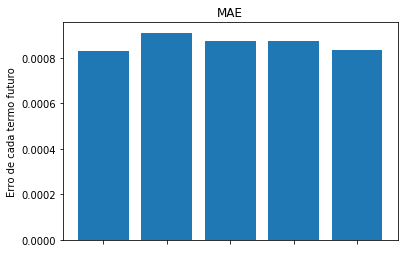

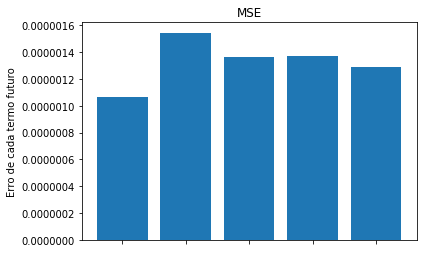

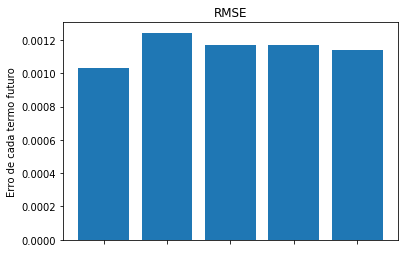

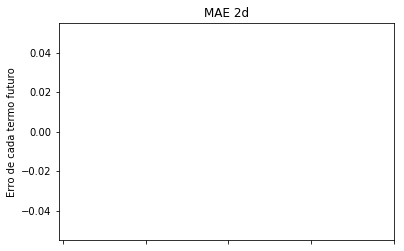

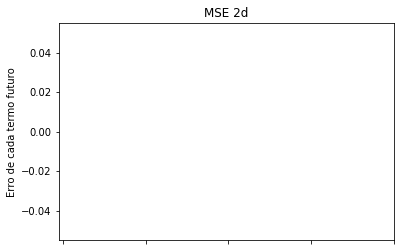

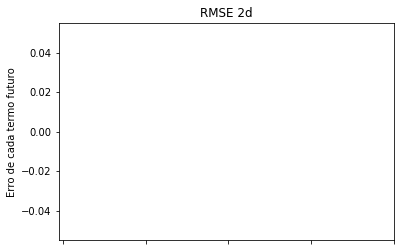

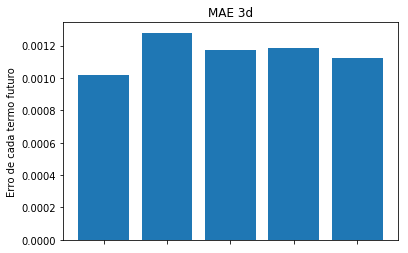

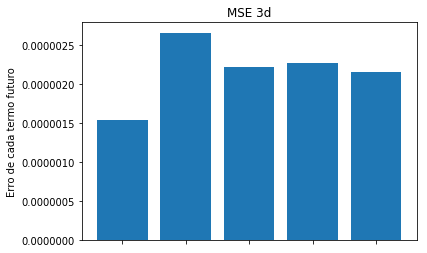

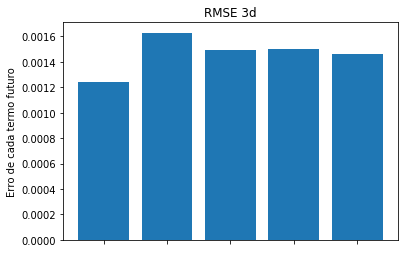

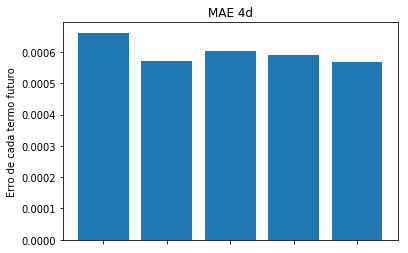

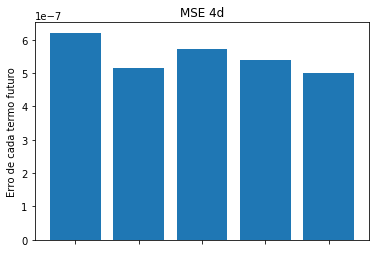

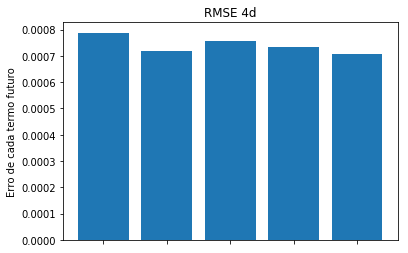

In [6]:

label = []

#plt.figure(figsize=(10,3))
index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae2d))
plt.bar(index, mae2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse2d))
plt.bar(index, mse2d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse2d))
plt.bar(index, rmse2d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 2d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae3d))
plt.bar(index, mae3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse3d))
plt.bar(index, mse3d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse3d))
plt.bar(index, rmse3d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 3d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mae4d))
plt.bar(index, mae4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(mse4d))
plt.bar(index, mse4d)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

#plt.figure(figsize=(10,3))
index = np.arange(len(rmse4d))
plt.bar(index, rmse4d)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE 4d')
plt.ylabel('Erro de cada termo futuro')
plt.show()

    

In [7]:
print(FUTUREerror.shape)

cont2 = 0
cont3 = 0
cont4 = 0
cont5 = 0
cont6 = 0
cont7 = 0
cont8 = 0
cont9 = 0
cont=0

for i in range(FUTUREerror.shape[0]):
    #print(FUTUREerror[i],menor[i,3])
    b = FUTUREerror[i]**2
    if np.sqrt(np.sum(b)/5)>menor[i,3]:
        cont+=1
    menor[i,3] = np.sqrt(np.sum(b)/5)
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2 +=1
        print(i)
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3 +=1
    elif menor[i,3]<0.001 and menor[i,3]>0.0001:
        cont4 +=1
    elif menor[i,3]<0.0001 and menor[i,3]>0.00001:
        cont5 +=1
    elif menor[i,3]<0.00001 and menor[i,3]>0.000001:
        cont6 +=1
    elif menor[i,3]<0.000001 and menor[i,3]>0.0000001:
        cont7 +=1 
    elif menor[i,3]<0.0000001 and menor[i,3]>0.00000001:
        cont8 +=1
    elif menor[i,3]<0.00000001 and menor[i,3]>0.000000001:
        cont9 +=1
    #print(np.sqrt(np.sum(b)/5),menor[i,3])

print(cont,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9)

(7645, 5)
3683 0 3677 3968 0 0 0 0 0


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [  0. 160. 448. 208. 189. 412. 483. 487. 593. 697.] [  0. 194. 454. 231. 219. 450. 500. 568. 620. 732.]
[0.         0.04630477 0.11798561 0.05742315 0.05336821 0.11275343
 0.12858077 0.13799869 0.15866579 0.18691956] [nan nan nan nan nan nan nan nan nan nan] [0.         0.04351373 0.12183846 0.05656785 0.0514006  0.11204787
 0.13135708 0.13244493 0.16127278 0.1895567 ] [0.         0.04889113 0.11441532 0.05821573 0.05519153 0.11340726
 0.12600806 0.14314516 0.15625    0.18447581]
oi [nan nan nan nan nan nan nan nan nan nan] [       nan 0.93972457 1.0326552  0.98510534 0.96313131 0.99374238
 1.02159198 0.95975495 1.01643065 1.01410847] [       nan 1.05585503 0.96973962 1.01380233 1.03416486 1.00579871
 0.97999151 1.03729361 0.98477432 0.9869262 ]


/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


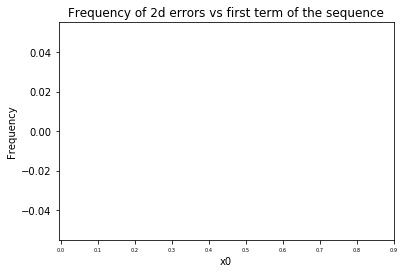

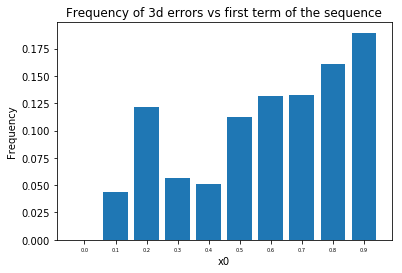

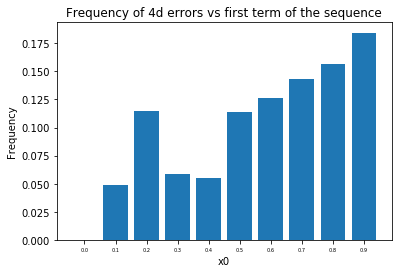

oi [nan nan nan nan nan nan nan nan nan nan] [       nan 0.93972457 1.0326552  0.98510534 0.96313131 0.99374238
 1.02159198 0.95975495 1.01643065 1.01410847] [       nan 1.05585503 0.96973962 1.01380233 1.03416486 1.00579871
 0.97999151 1.03729361 0.98477432 0.9869262 ]


/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


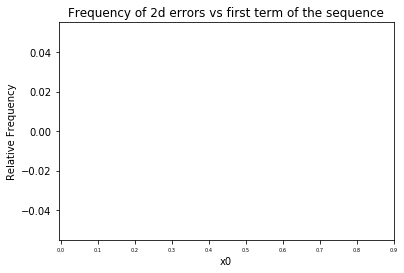

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


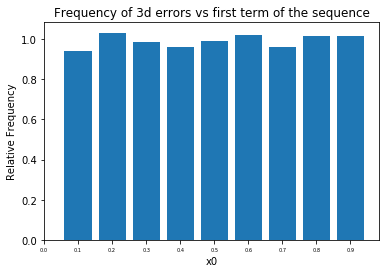

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


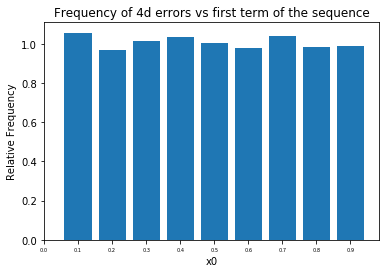

In [8]:
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 110.  50.  35.  39.  54.  80.  54.  52.  30.  38.
  37.  29.  31.  19.  22.  23.  18.  22.  17.  14.  21.  21.  22.  23.
  13.  22.  25.  14.  14.  14.  25.  17.  17.  32.  35.  20.  26.  26.
  95.  62.  51.  48.  46.  45.  40.  41.  47.  45.  50.  71.  45.  53.
  36.  57.  42.  55.  41.  55.  54.  50.  48.  49.  59.  59.  54.  74.
  46.  51.  56.  67.  60.  67.  49.  77. 134. 188. 249.   0.   0.   0.
   0.   0.] [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 137.  57.  36.  30.  38.  83.  60.  50.  43.  41.
  38.  35.  33.  22.  25.  23.  20.  22.  2

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


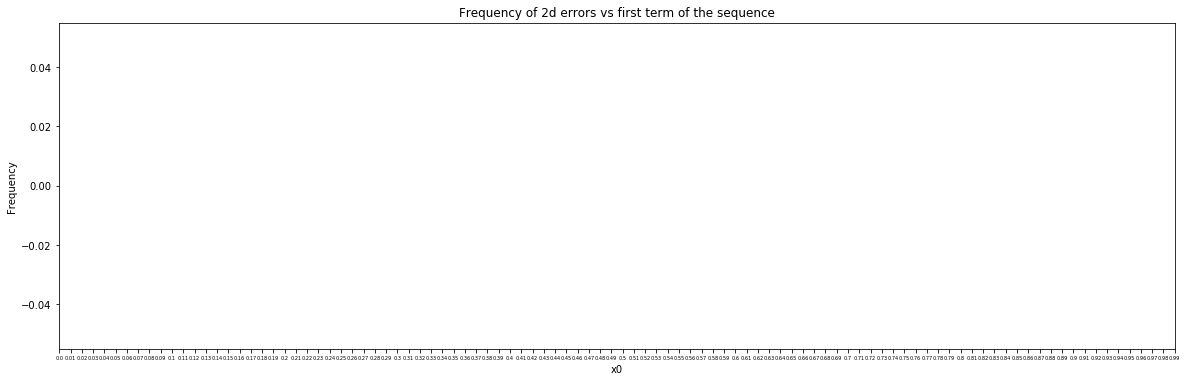

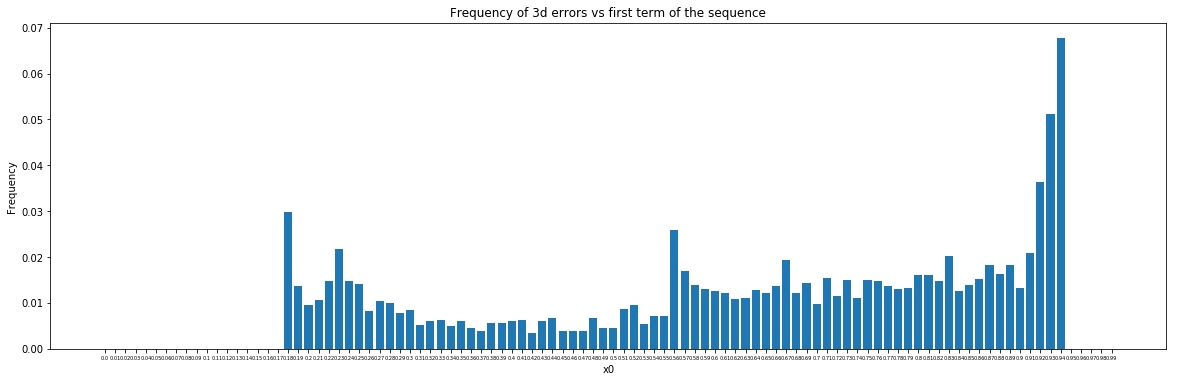

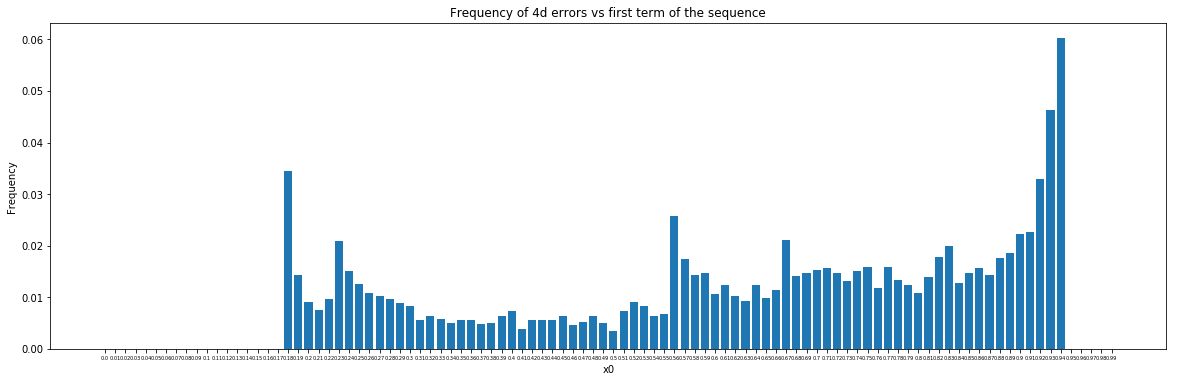

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


oi [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan] [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.92593306 0.97156103 1.02492847 1.17516643 1.22036514 1.02043711
 0.98485608 1.05995403 0.85444134 1.00009295 1.02570936 0.94211059
 1.00708373 0.96350418 0.97321475 1.0395703  0.98485608 1.0395703
 0.90629206 0.88205965 1.06492568 0.94917288 0.89688418 1.25842721
 0.77225222 1.0395703  1.10592585 0.74635817 0.90962401 0.83165624
 1.0395703  0.95528082 1.14017388 1.09069671 1.02492847

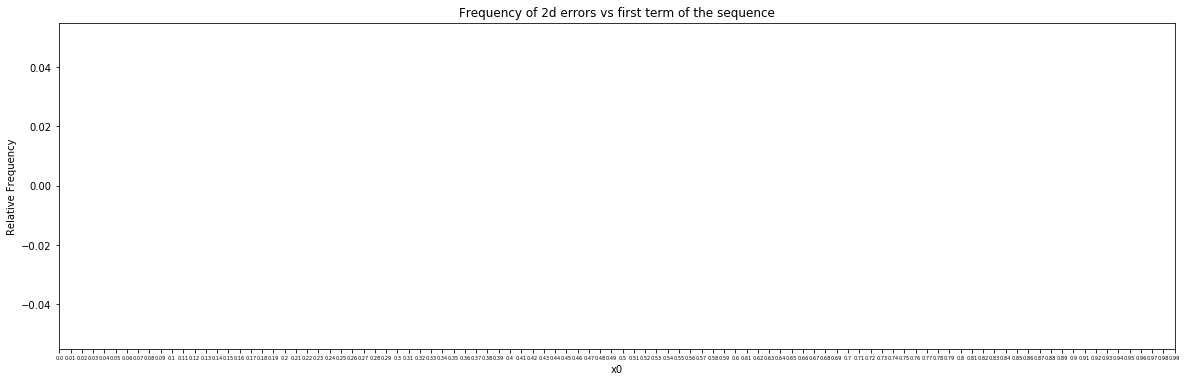

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


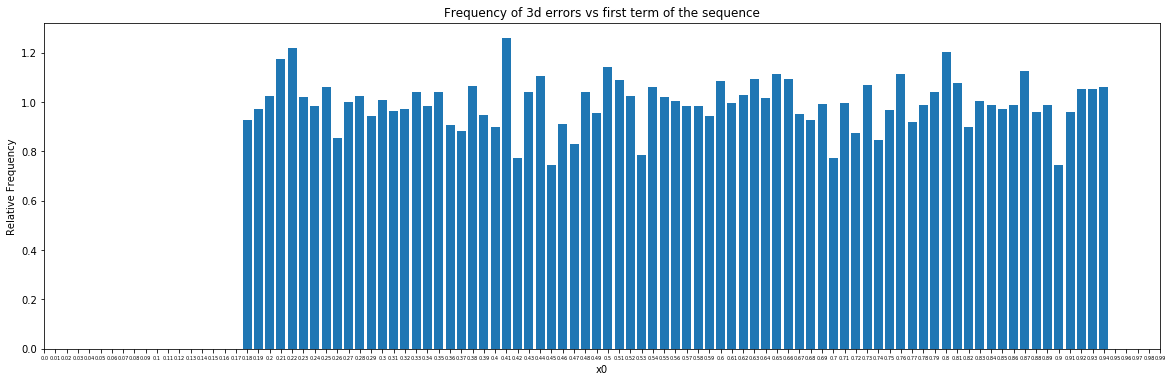

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


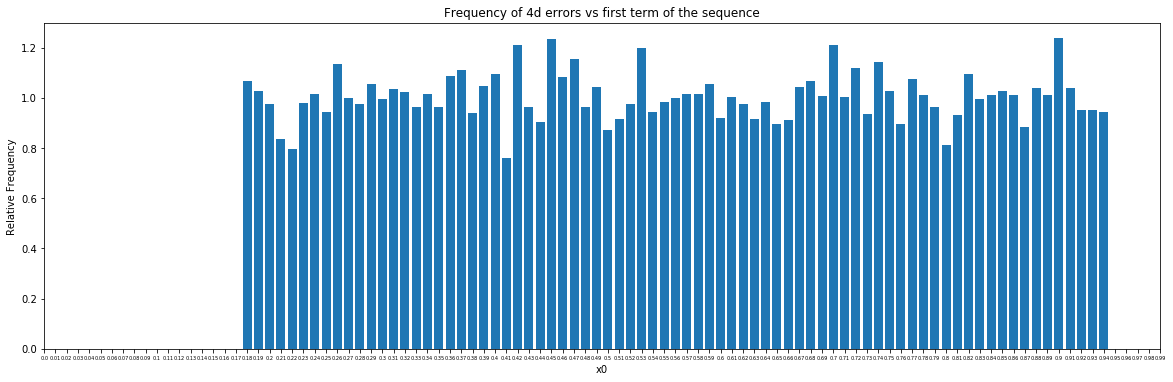

In [9]:
div = 100

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


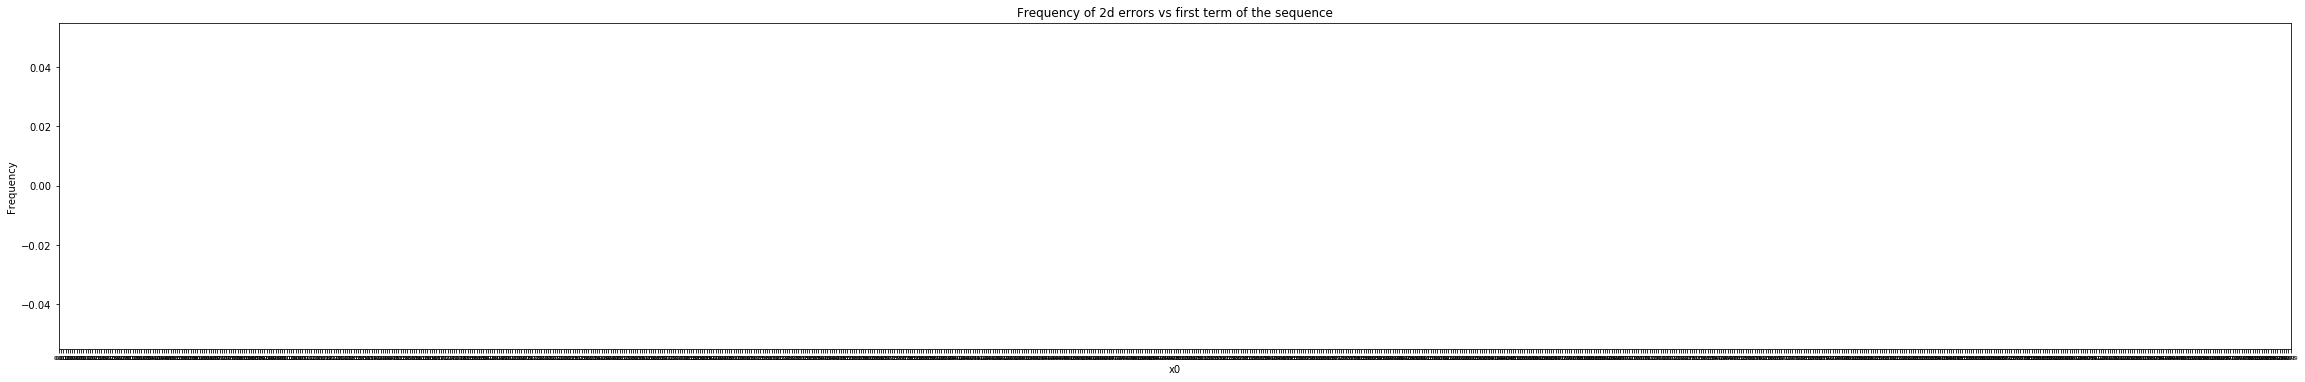

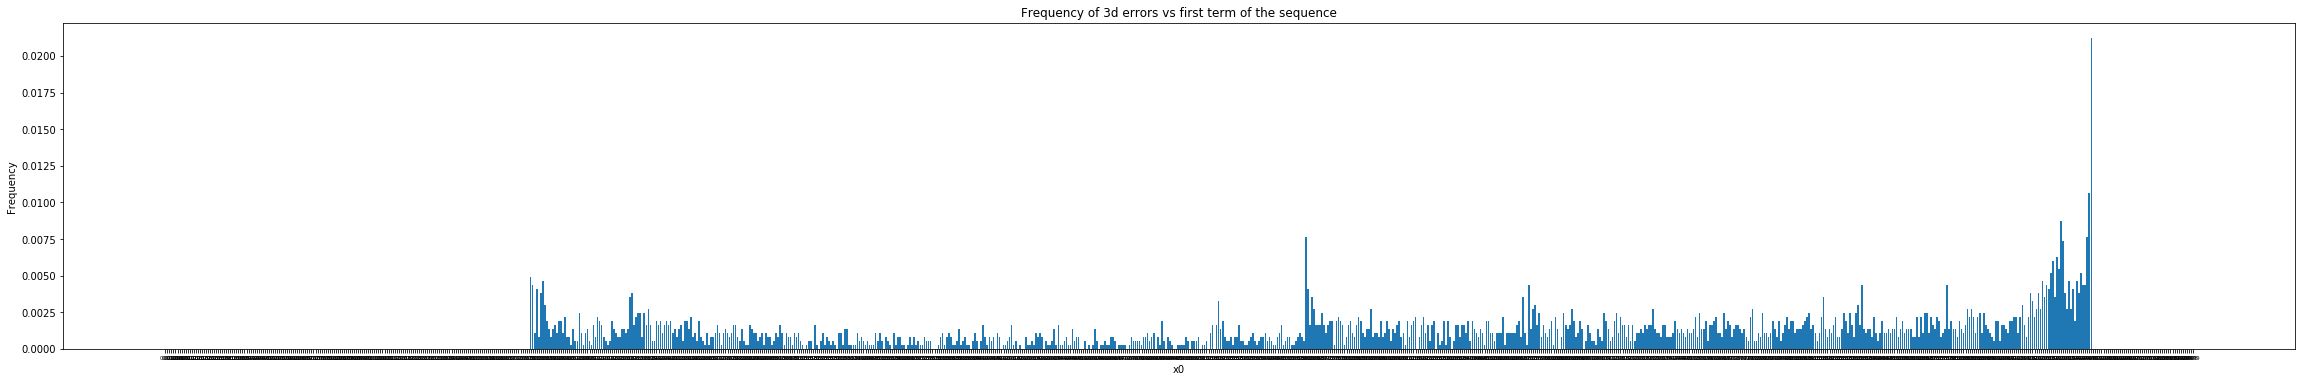

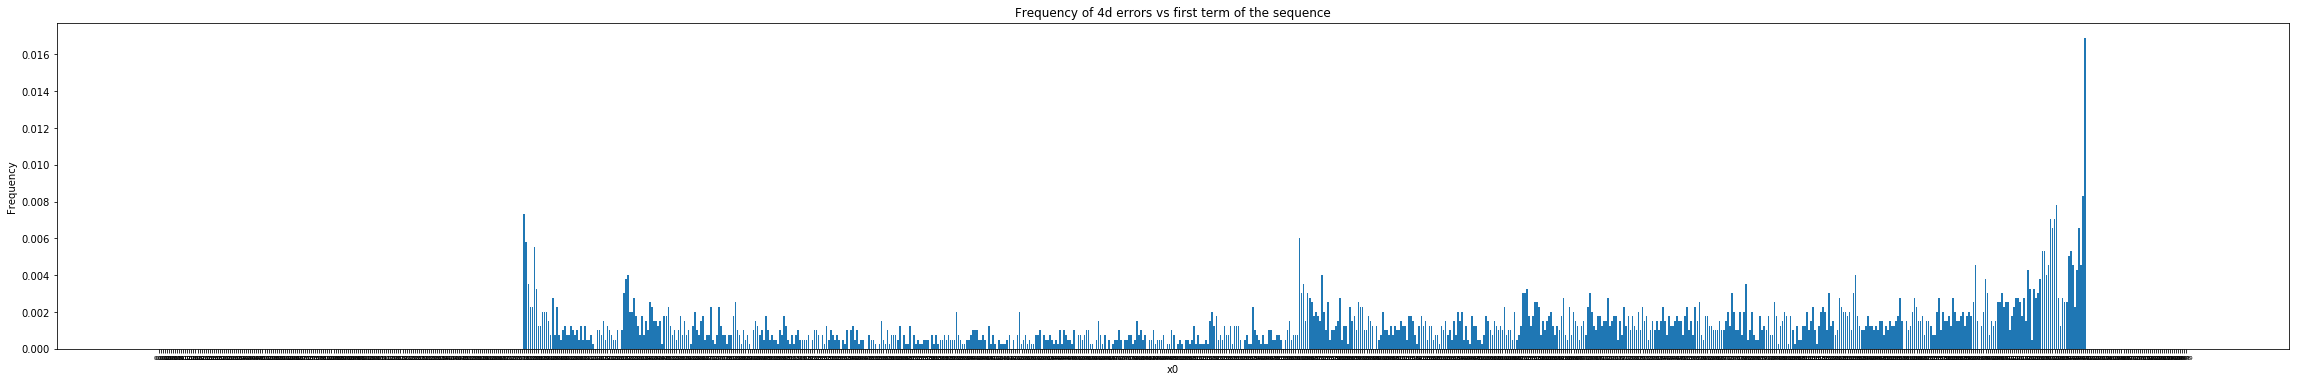

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


oi [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan

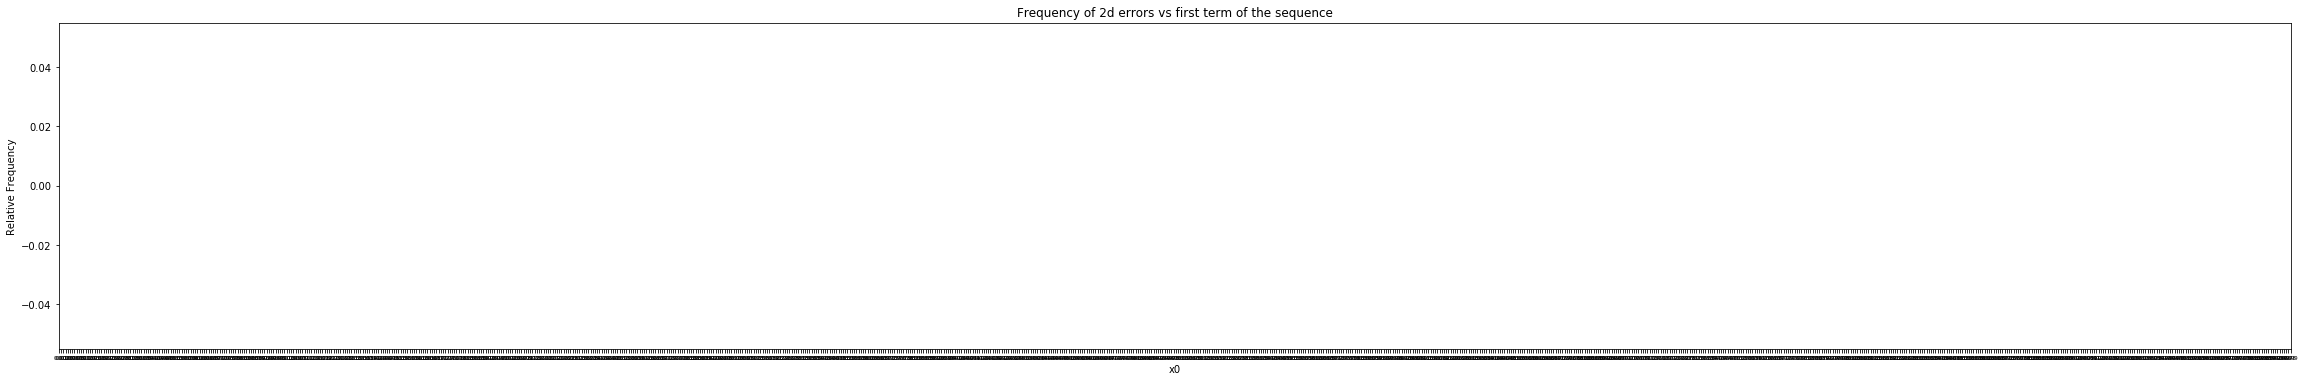

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide


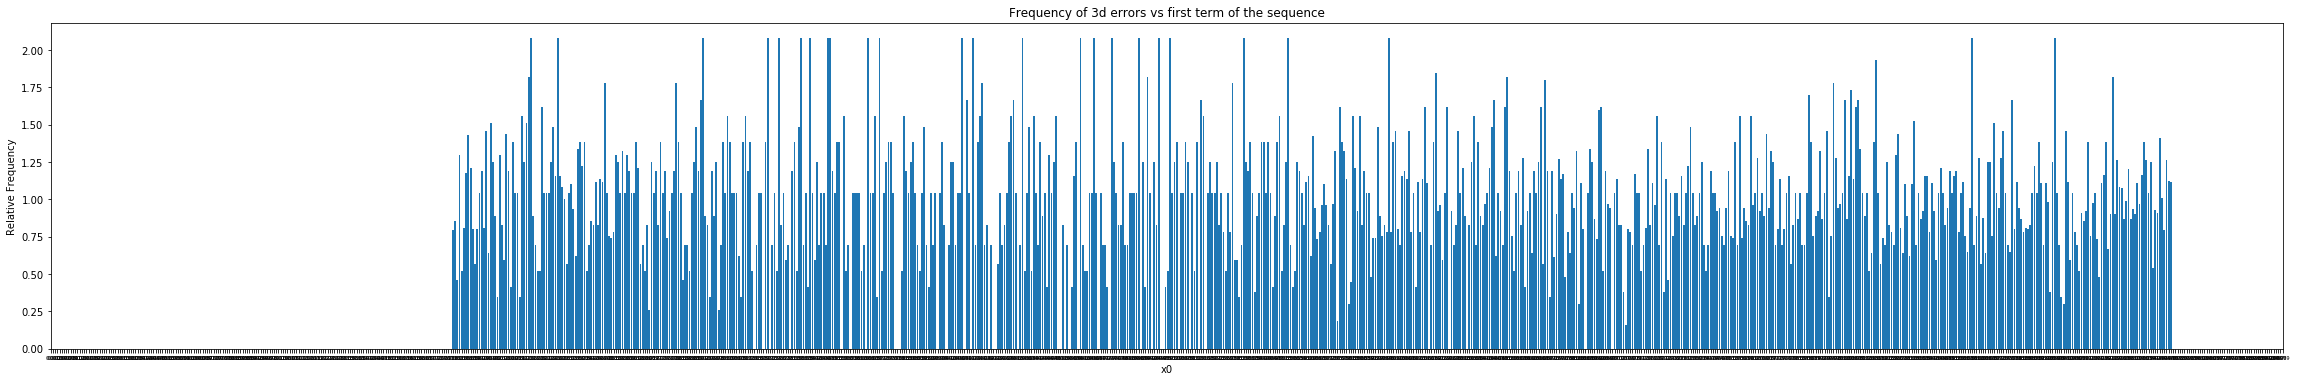

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


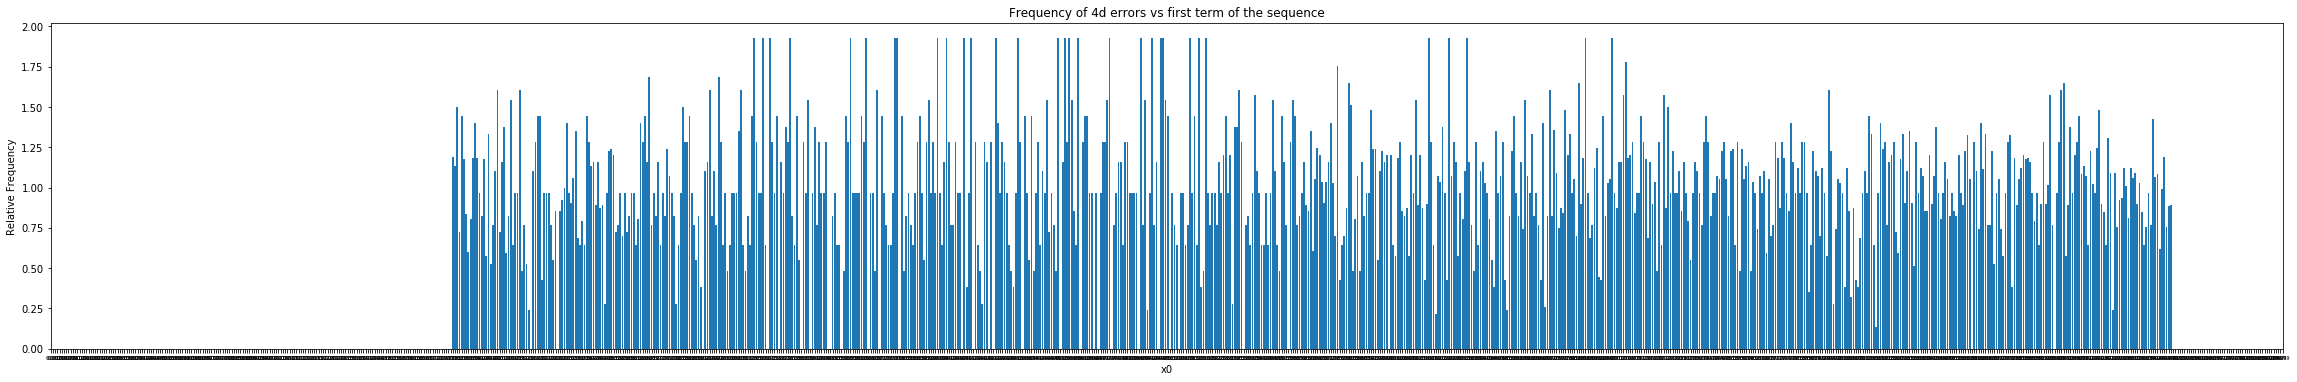

In [10]:
div = 1000

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


mae [0.0008320964594602677, 0.0009114515586586973, 0.0008752563160963335, 0.0008765161796279481] 
 mse [1.0642917957654744e-06, 1.5450593254078095e-06, 1.3656977850052993e-06, 1.3677837554039296e-06] 
 rmse [0.0010316451888927095, 0.0012430041534153495, 0.001168630730815042, 0.0011695228751093026] 

mae [nan, nan, nan, nan] 
 mse [nan, nan, nan, nan] 
 rmse [nan, nan, nan, nan] 

mae [0.001016074159159746, 0.0012793714273455444, 0.0011697909251999234, 0.0011857183794672863] 
 mse [1.5428090300655532e-06, 2.6561662364482913e-06, 2.2220252795911544e-06, 2.2615498634504525e-06] 
 rmse [0.0012420986394266573, 0.0016297749036134688, 0.0014906459269696324, 0.0015038450264074595] 

mae [0.001016074159159746, 0.0012793714273455444, 0.0011697909251999234, 0.0011857183794672863] 
 mse [1.5428090300655532e-06, 2.6561662364482913e-06, 2.2220252795911544e-06, 2.2615498634504525e-06] 
 rmse [0.0012420986394266573, 0.0016297749036134688, 0.0014906459269696324, 0.0015038450264074595] 

[0. 0. 0. 0. 0.

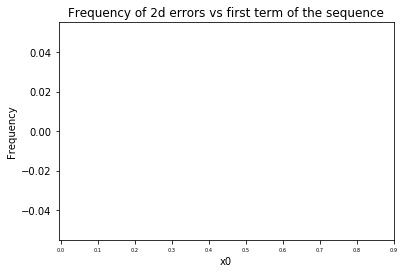

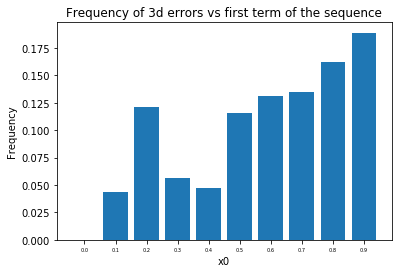

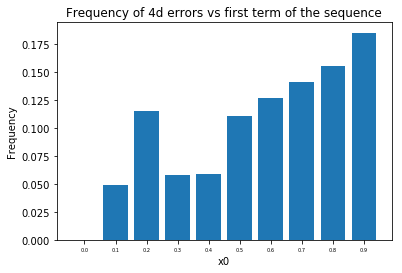

oi [nan nan nan nan nan nan nan nan nan nan] [       nan 0.93530901 1.02827359 0.98627819 0.87914462 1.0218205
 1.01695368 0.97772696 1.02184689 1.00997463] [       nan 1.05763466 0.97481042 1.01222507 1.10767279 0.98055962
 0.98489559 1.01984355 0.98053611 0.99111338]


/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


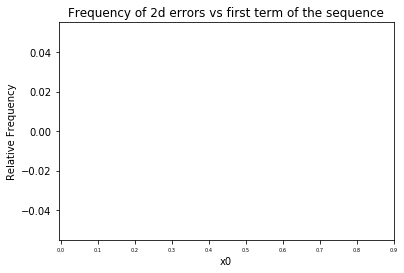

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in true_divide


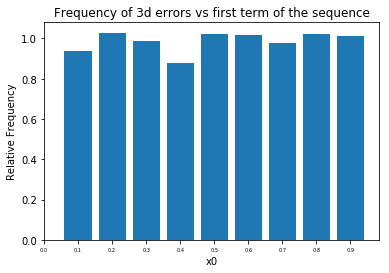

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:100: RuntimeWarning: invalid value encountered in true_divide


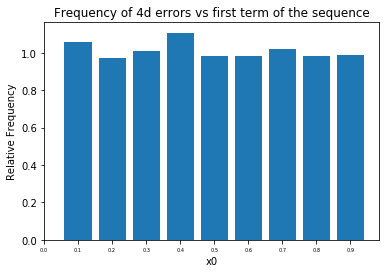

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.] [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 104.  52.  36.  39.  52.  78.  50.  45.  32.  39.
  36.  30.  29.  20.  22.  23.  15.  21.  17.  14.  20.  23.  20.  21.
  11.  18.  25.  15.  10.  12.  21.  16.  18.  34.  39.  18.  29.  31.
  92.  62.  47.  45.  45.  44.  37.  40.  48.  44.  50.  66.  45.  52.
  37.  51.  47.  54.  45.  53.  52.  53.  47.  47.  54.  59.  56.  71.
  41.  57.  53.  62.  59.  72.  54.  77. 126. 179. 244.   0.   0.   0.
   0.   0.] [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 143.  55.  35.  30.  40.  85.  64.  57.  41.  40.
  39.  34.  35.  21.  25.  23.  23.  23.  2

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:133: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:143: RuntimeWarning: invalid value encountered in true_divide


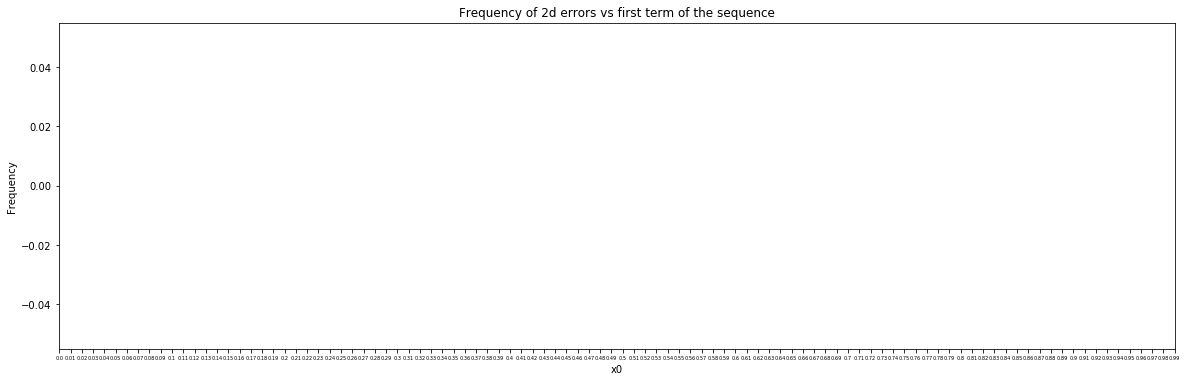

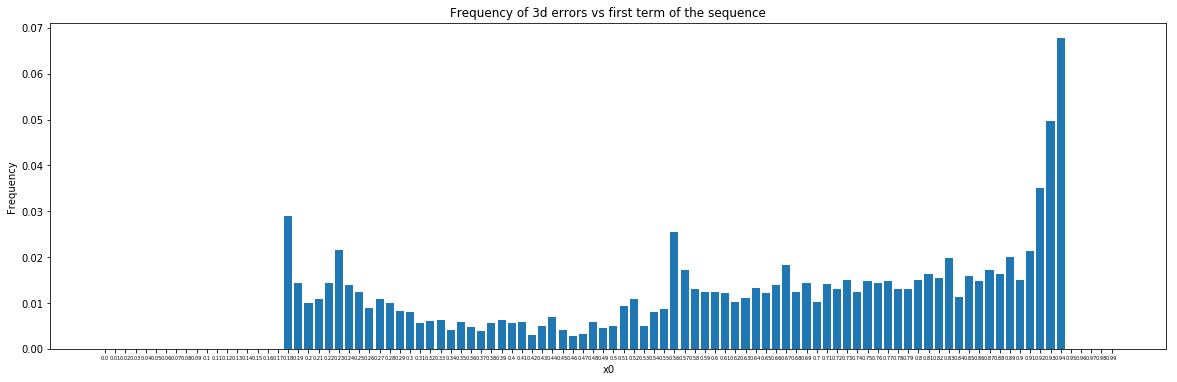

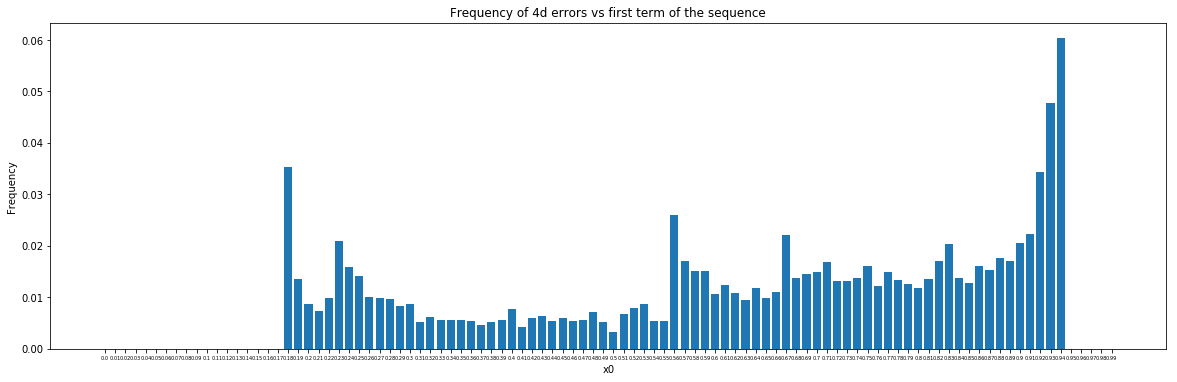

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:170: RuntimeWarning: invalid value encountered in true_divide


oi [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan] [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.89365557 1.03146227 1.0761627  1.19963547 1.19963547 1.0156423
 0.93089122 0.93636705 0.93038114 1.04778288 1.01876735 0.99488999
 0.96172699 1.03533267 0.9934788  1.06121599 0.8378021  1.0129789
 0.92516266 0.90042569 1.03533267 1.06121599 0.83232627 1.17292294
 0.66705005 0.86826763 1.12895318 0.81631999 0.66325999 0.72769097
 0.89142143 0.91780842 1.23237986 1.18299488 1.16584292 

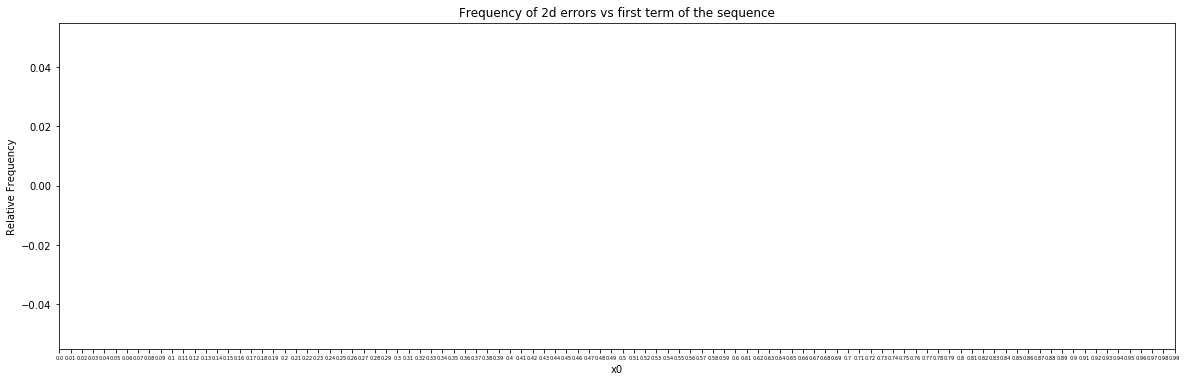

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:180: RuntimeWarning: invalid value encountered in true_divide


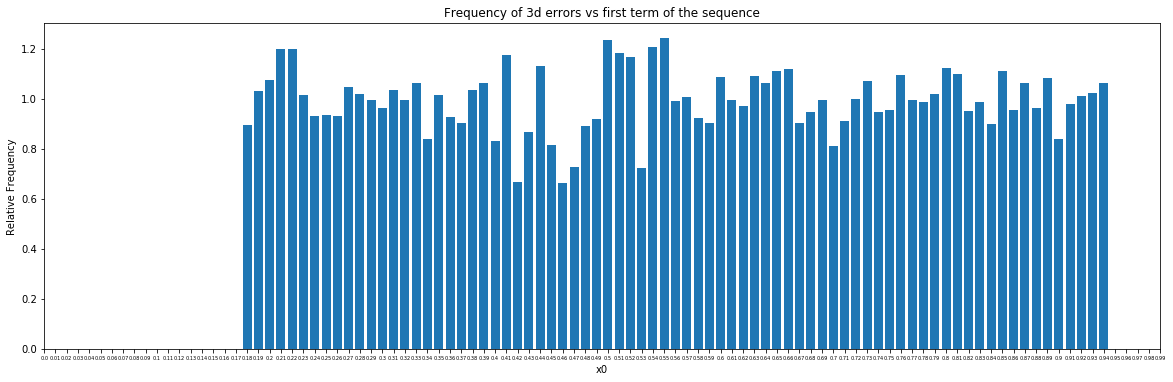

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:188: RuntimeWarning: invalid value encountered in true_divide


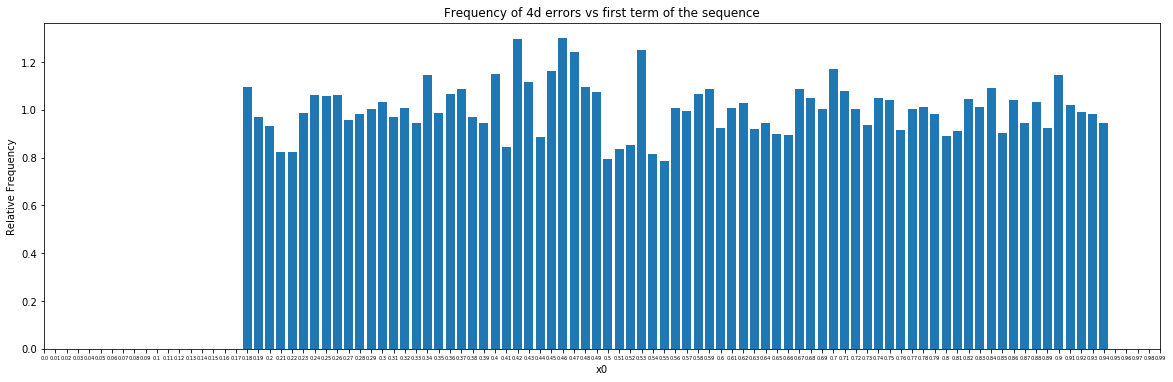

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:221: RuntimeWarning: invalid value encountered in true_divide
/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:231: RuntimeWarning: invalid value encountered in true_divide


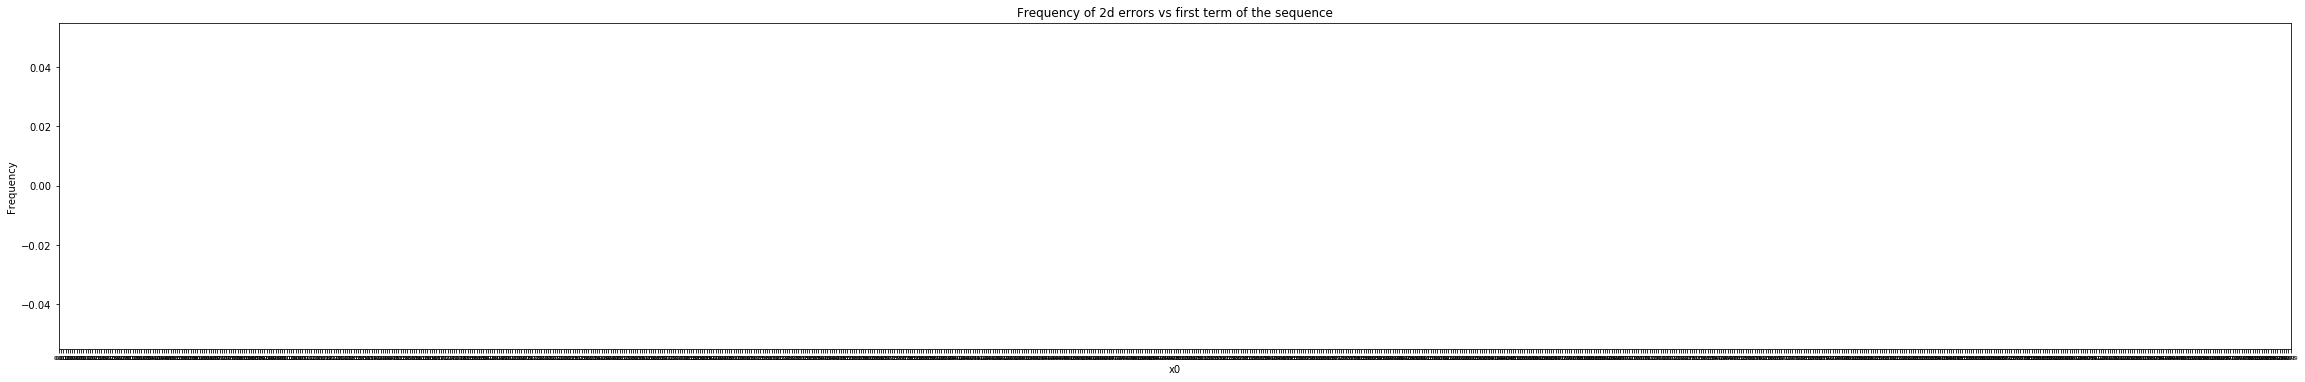

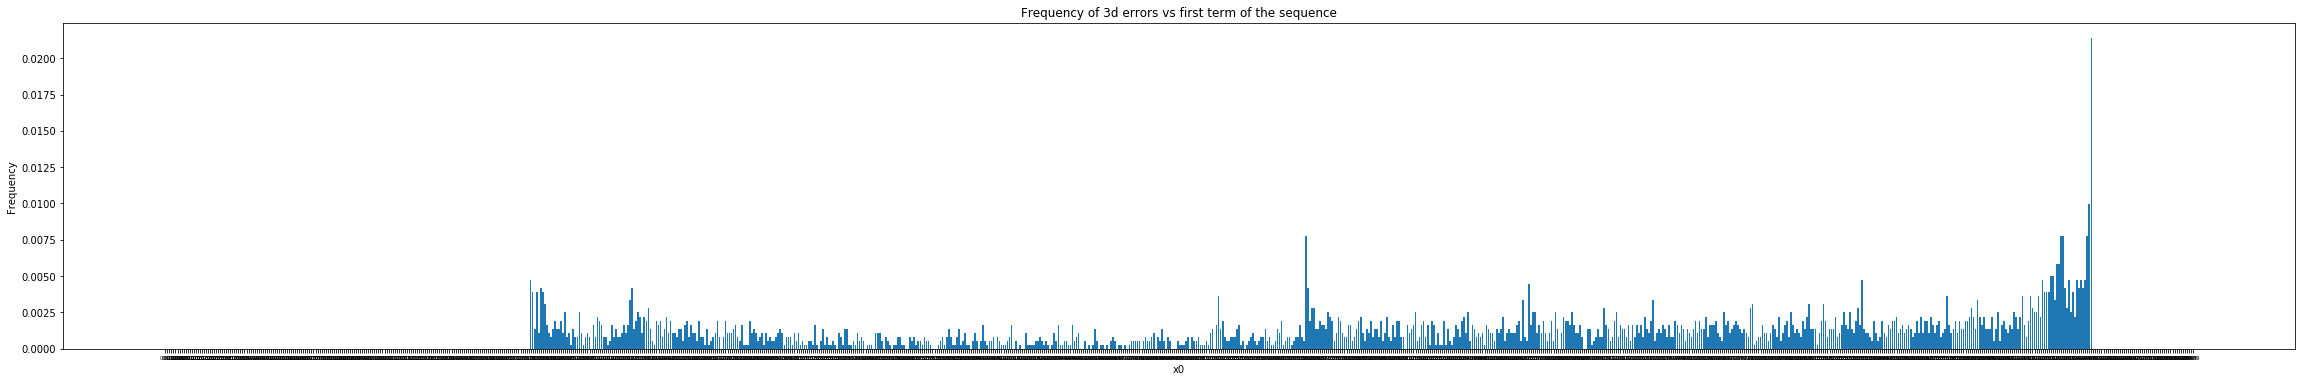

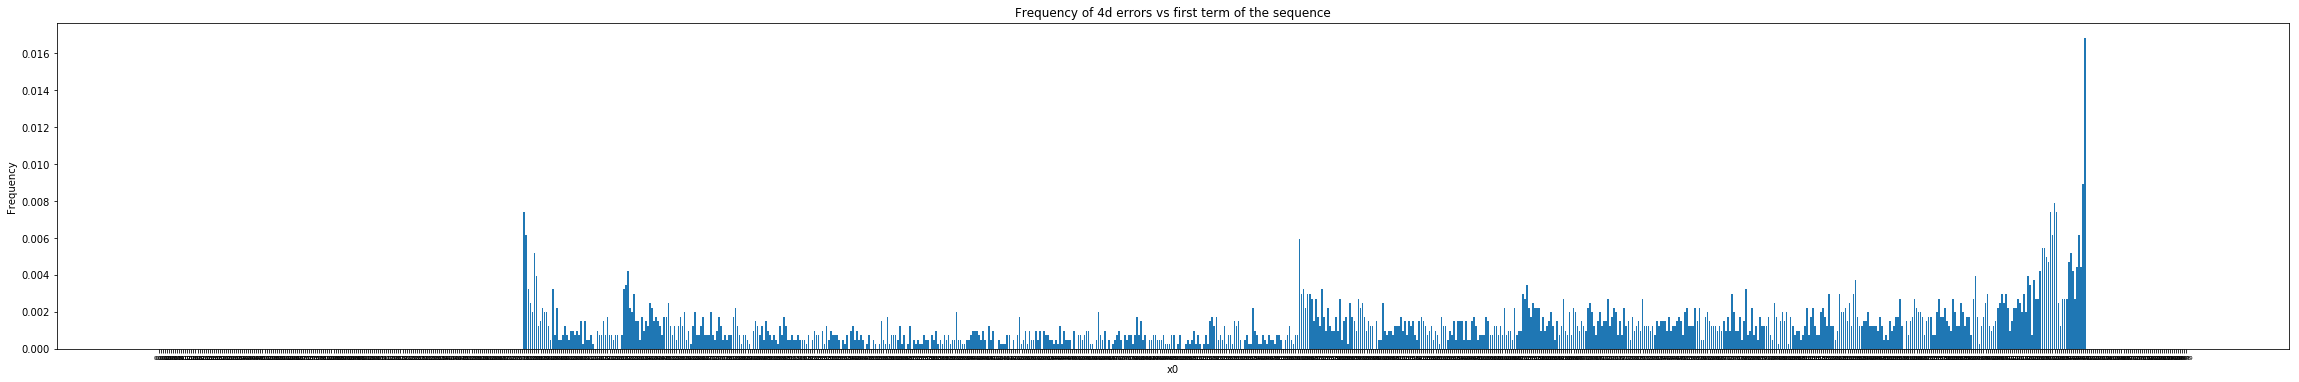

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:258: RuntimeWarning: invalid value encountered in true_divide


oi [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan

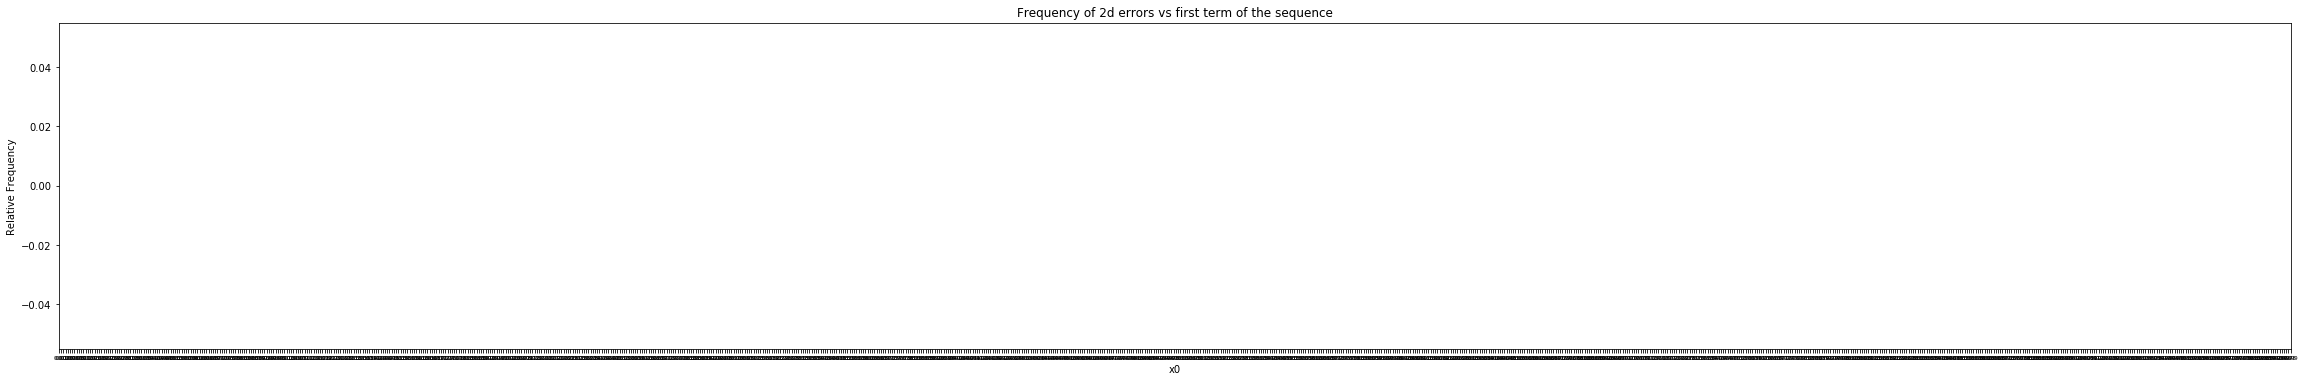

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:268: RuntimeWarning: invalid value encountered in true_divide


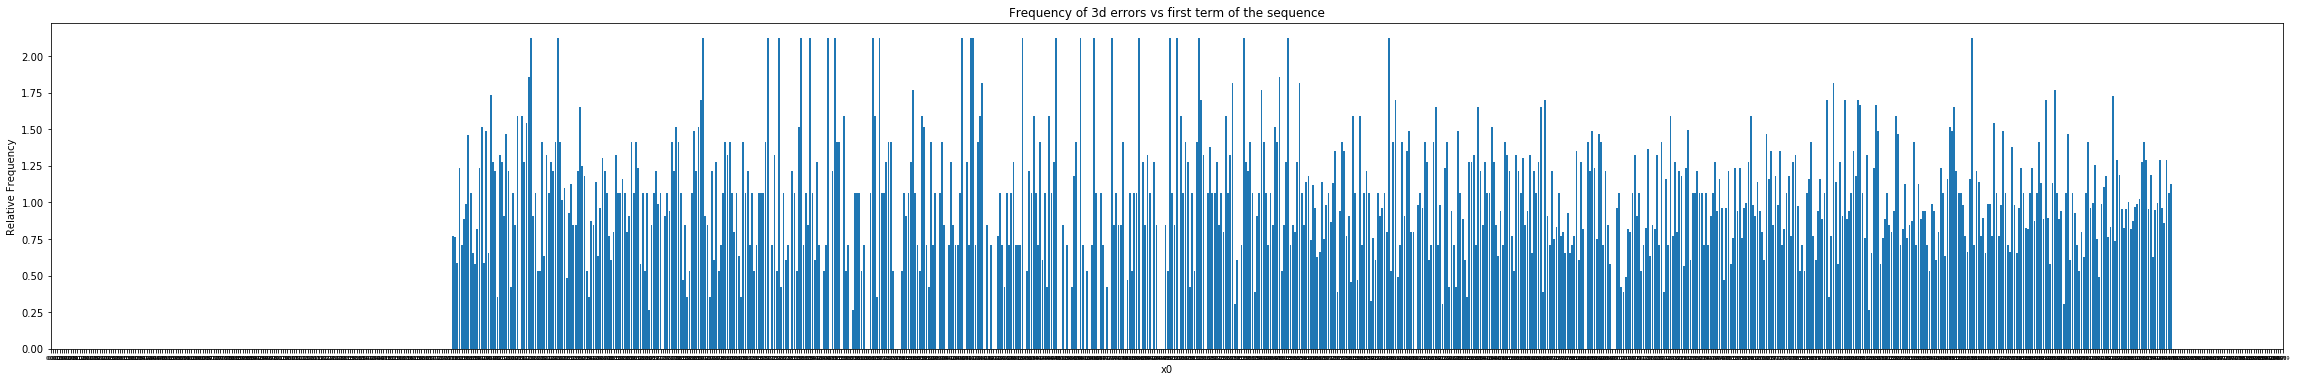

/home/ana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:276: RuntimeWarning: invalid value encountered in true_divide


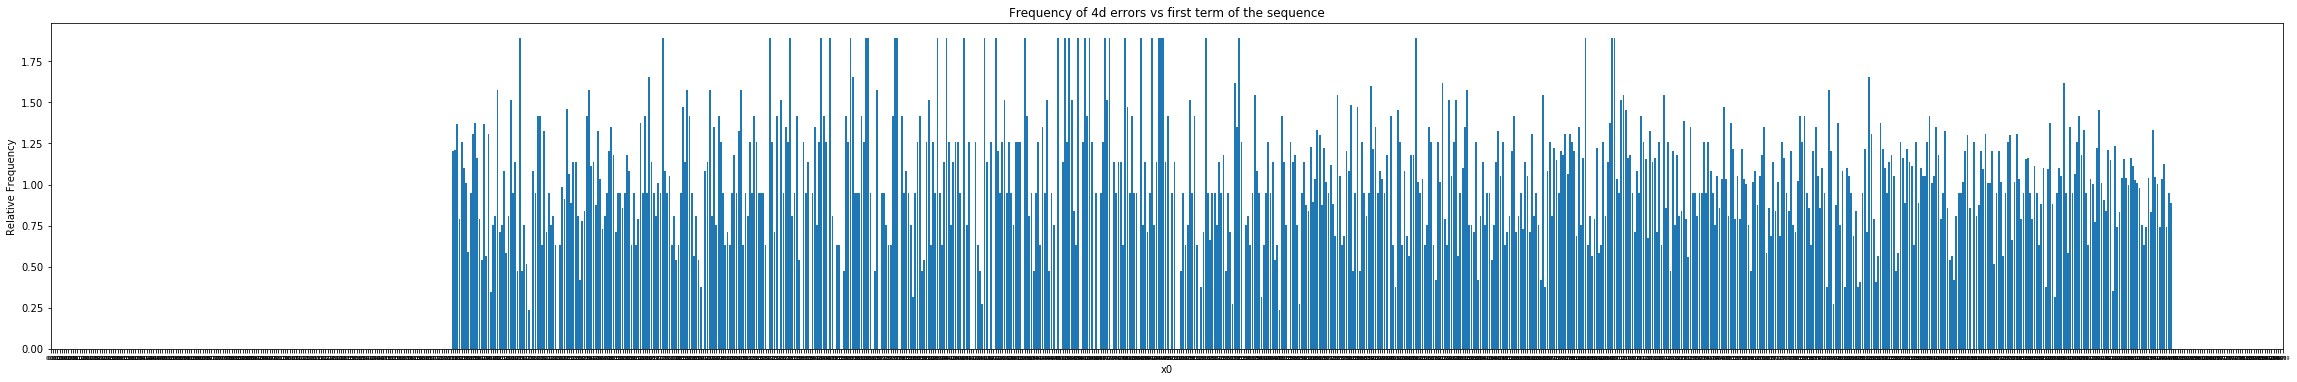

In [11]:
FUTUREerror = FUTUREerror[:,0:4]
FUTUREerror2d = FUTUREerror2d[:,0:4]
FUTUREerror3d = FUTUREerror3d[:,0:4]
FUTUREerror4d = FUTUREerror4d[:,0:4]
mae,mse,rmse = geterrors(FUTUREerror)
mae2d,mse2d,rmse2d = geterrors(FUTUREerror2d)
mae3d,mse3d,rmse3d = geterrors(FUTUREerror3d)
mae4d,mse4d,rmse4d = geterrors(FUTUREerror4d)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')
print('mae',mae2d,'\n mse',mse2d,'\n rmse',rmse2d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')
print('mae',mae3d,'\n mse',mse3d,'\n rmse',rmse3d,'\n')

for i in range(FUTUREerror.shape[0]):
    b = FUTUREerror[i]**2
    menor[i,3] = np.sqrt(np.sum(b)/4)
    
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

div = 100

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

div = 1000

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()